In [67]:
#Importing the libraries that we will use through the project
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import warnings
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle
from functions import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [68]:
#Reading the data from a xls file
data = pd.read_excel(r'C:\Users\Samu\Documents\Ironhack\House-Price-Prediction\files\regression_data.xls')

In [69]:
#Using the function I have created to check the data
fast_eda(data)

Shape of the DataFrame: (21597, 21)

Data types of the DataFrame:


id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object


First 5 rows of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000



Last 5 rows of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,2014-10-15,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000



Statistical summary of the DataFrame:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,2014-10-29 04:20:38.171968512,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
min,1.000102e+06,2014-05-02 00:00:00,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,2014-07-22 00:00:00,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,2014-10-16 00:00:00,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,2015-02-17 00:00:00,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,2015-05-27 00:00:00,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06
std,2.876736e+09,NaN,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05



Checking for missing values:
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Checking for duplicates:
0


In [70]:
#Now, we will check the unqie values of the columns to see if there are any columns that we can drop or transform
all_unique_values(data)


id:


array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64)


date:


<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]


bedrooms:


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)


bathrooms:


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])


sqft_living:


array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)


sqft_lot:


array([ 5650,  7242, 10000, ...,  5813,  2388,  1076], dtype=int64)


floors:


array([1. , 2. , 1.5, 3. , 2.5, 3.5])


waterfront:


array([0, 1], dtype=int64)


view:


array([0, 3, 4, 2, 1], dtype=int64)


condition:


array([3, 5, 4, 1, 2], dtype=int64)


grade:


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)


sqft_above:


array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18


sqft_basement:


array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23


yr_built:


array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)


yr_renovated:


array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)


zipcode:


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)


lat:


array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])


long:


array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.


sqft_living15:


array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26


sqft_lot15:


array([5650, 7639, 8062, ..., 5731, 1509, 2007], dtype=int64)


price:


array([221900, 538000, 180000, ..., 541800, 610685, 402101], dtype=int64)

By checking the values, we can see that there are some columns that could be categorical, bathrooms for example. To try and make it easier for the model, I will encode the column

In [71]:
#Now, I will start encoding the categorical columns, so we can proceed into the division into numerical and categorical.
#I will start with the column bathrooms, making it so it its only 1, 2, 3, 4, 5,6,or 7
data['bathrooms'] = data['bathrooms'].apply(lambda x: 1 if x >= 0 and x < 2 else (2 if x >= 2 and x < 3 else (3 if x >= 3 and x < 4 else (4 if x >= 4 and x < 5 else (5 if x >= 5 and x < 6 else (6 if x >= 6 and x < 7 else 7))))))

In [72]:
#Checking the values after the transformation
data['bathrooms'].value_counts()

bathrooms
2    10539
1     8428
3     2228
4      338
5       48
6       12
7        4
Name: count, dtype: int64

In [73]:
#The next column to be transformed will be floors, making it so it is only 1, 2, or 3
data['floors'] = data['floors'].apply(lambda x: 1 if x >= 0 and x < 2 else (2 if x >= 2 and x < 3 else 3))

In [74]:
#Checking the values after the transformation
data['floors'].value_counts()

floors
1    12583
2     8396
3      618
Name: count, dtype: int64

In [75]:
#Grouping the zipcodes based on the first 4 digits of the values in different columns
data['neighborhoods'] = data['zipcode'].apply(lambda x: str(x)[:4])

#Checking the unique values of the column to see if the grouping was successful
data['neighborhoods'].unique()

array(['9817', '9812', '9802', '9813', '9807', '9805', '9800', '9819',
       '9814', '9803', '9811', '9810', '9801', '9804', '9809', '9816',
       '9806', '9815', '9818'], dtype=object)

In [76]:
#Changing the value names of the neighborhoods to make it easier to understand using only the last two digits
for val in data['neighborhoods'].unique():
    data['neighborhoods'] = data['neighborhoods'].replace(val, str(val)[2:])

In [77]:
data['neighborhoods'].unique()

array(['17', '12', '02', '13', '07', '05', '00', '19', '14', '03', '11',
       '10', '01', '04', '09', '16', '06', '15', '18'], dtype=object)

In [78]:
#Converting the column to int
data['neighborhoods'] = data['neighborhoods'].astype(int)

In [79]:
#Dropping the hour part of the date column as it doesn't contain any hour.
data['date'] = data['date'].astype(str).apply(lambda x: x.split(' ')[0])


In [80]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [81]:
# Checking the correlation of the data with the target, price
correlation = data.corr()
correlation['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.510550
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.237264
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
date            -0.003998
id              -0.016772
zipcode         -0.053402
neighborhoods   -0.053535
Name: price, dtype: float64

From the results, we can see that sqft_living, grade and sqft_above have the highest correlation, but no to high so it needs to be removed. If we need to improve the model, maybe we can try to revisit this.

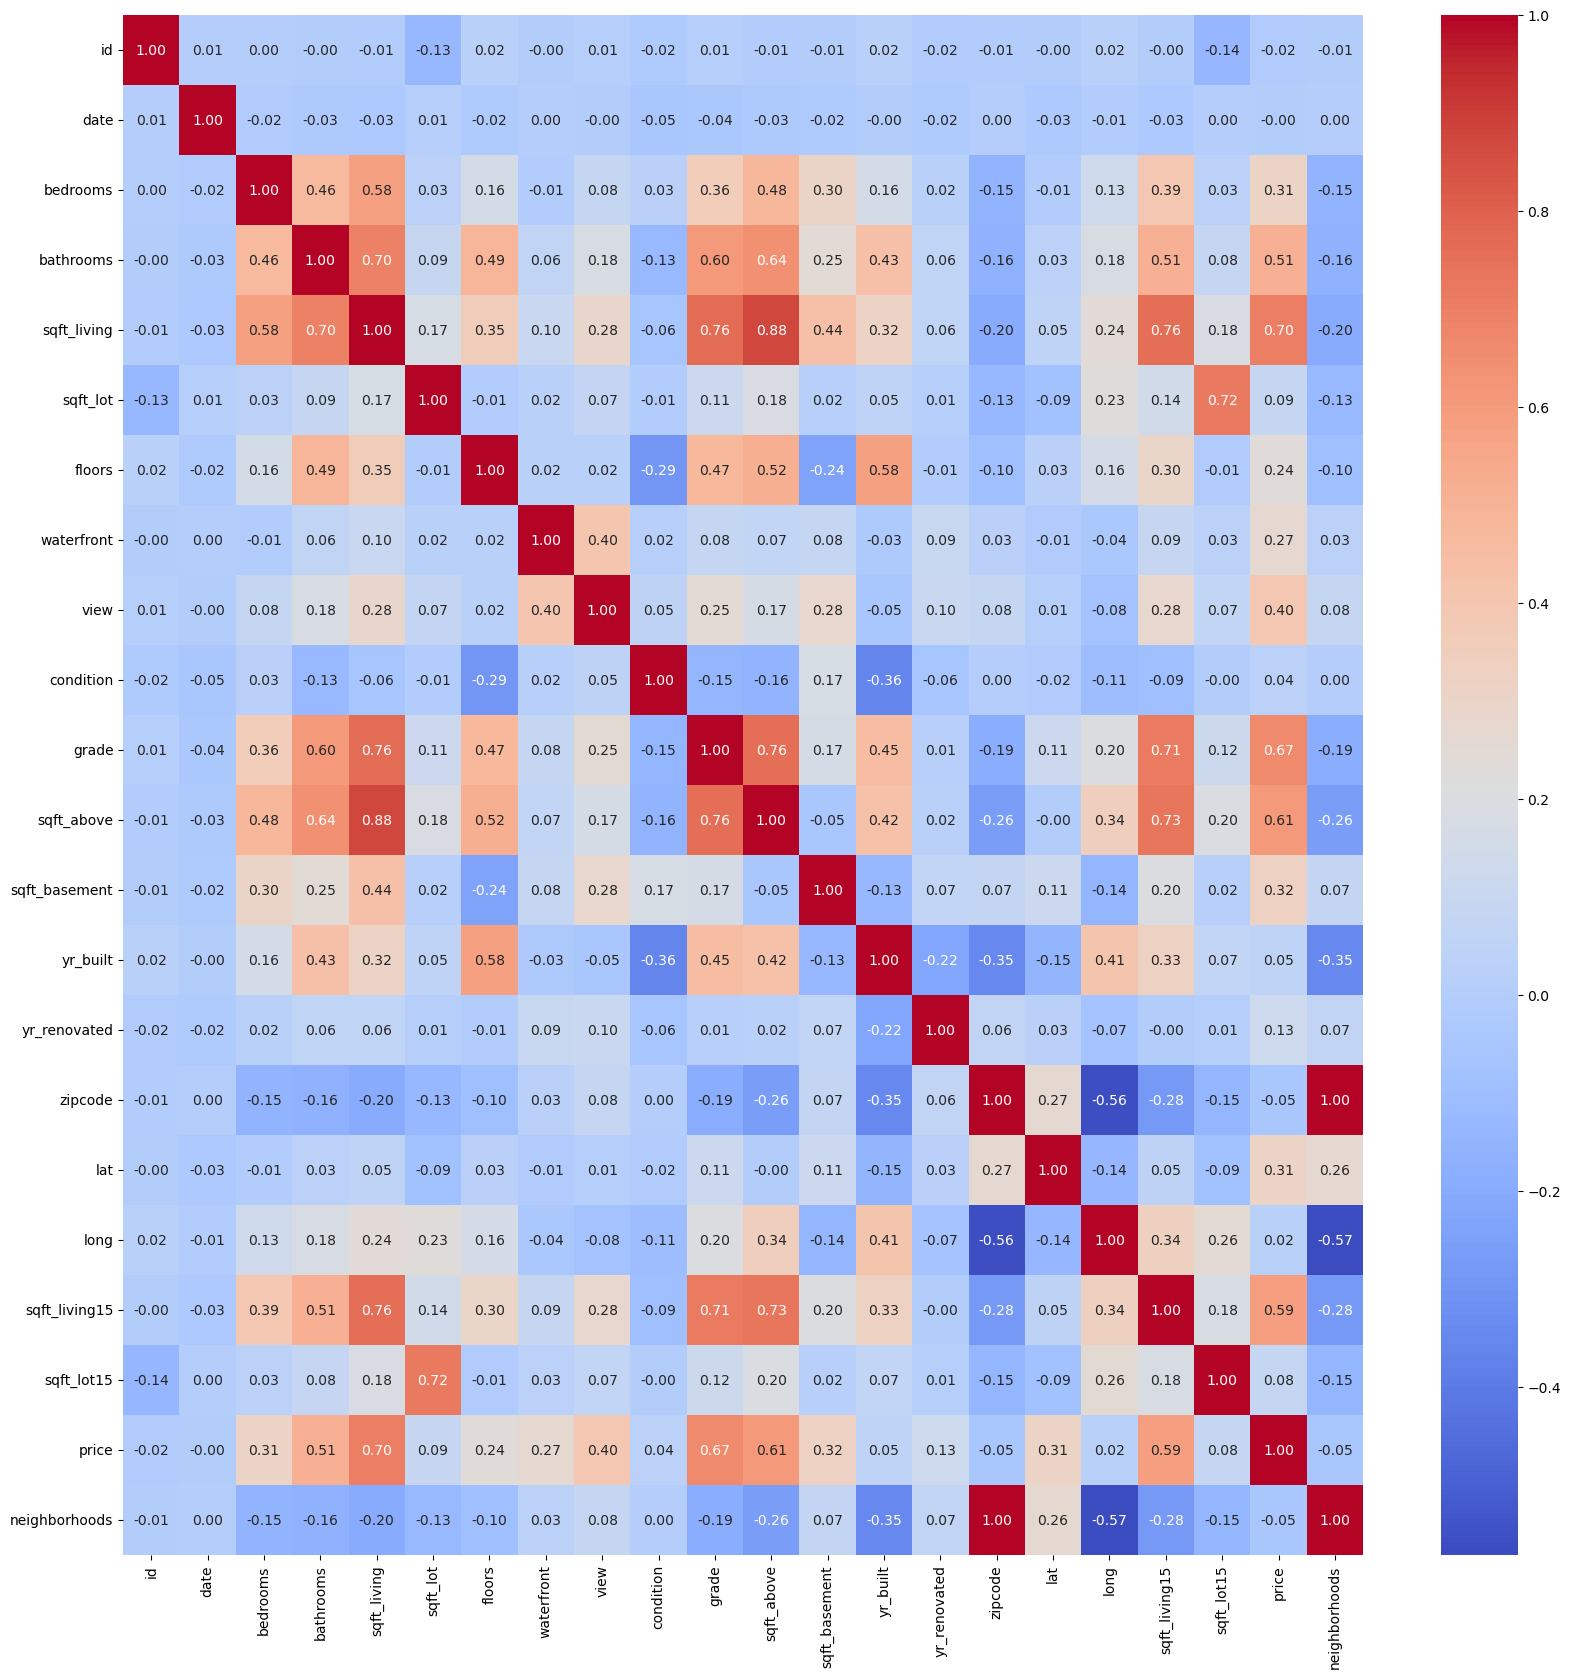

In [82]:
#Plotting the correlation of the data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

From this heatmap, we can see that sqft_living has a high correlation with sqft_above, maybe because they represent almost the same thing. Also, it has high relationship with sqft_living15, that represents the same but after a renovation, with data from 2015. I will not drop them now, but will revisit this after testing the models, to try and improve them.

In [83]:
#Converting the column date to datetime again
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [84]:
#Splitting the date column between day, month and year
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [85]:
#Now, I will divide the data into numerical and categorical
categorical = data[['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms', 'floors','neighborhoods']]
numerical = data.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', 'yr_renovated', 'lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'neighborhoods'], axis=1)

#I will also separate the location columns from the rest of the data
location = data[['lat', 'long']]

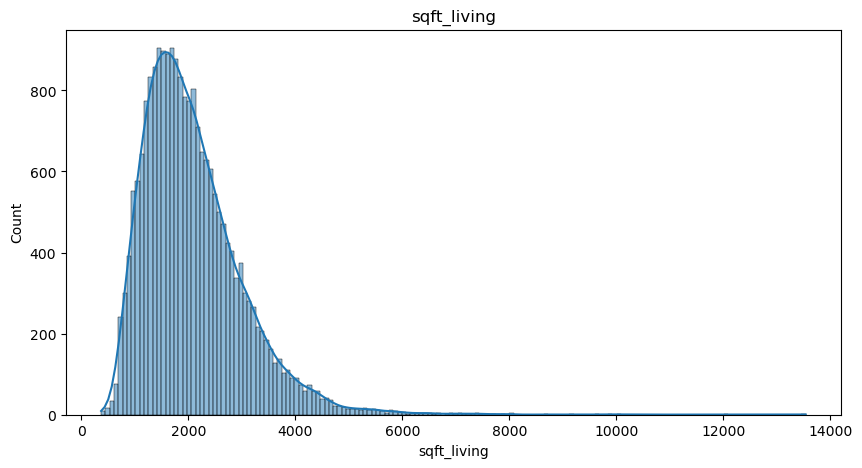

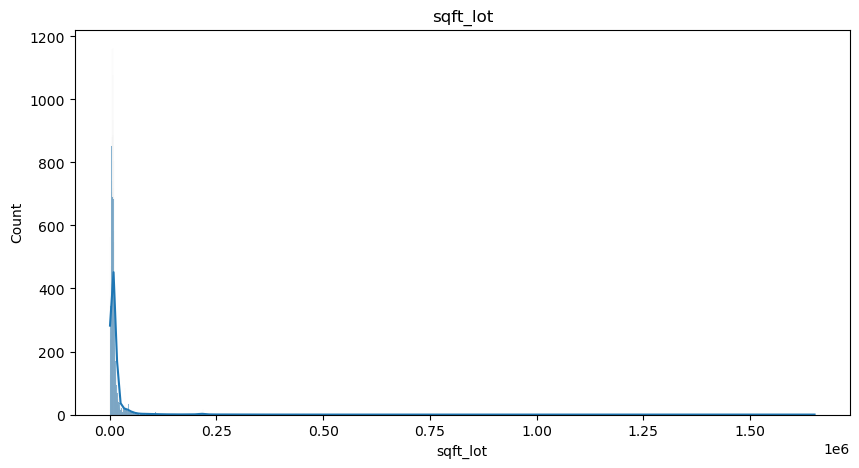

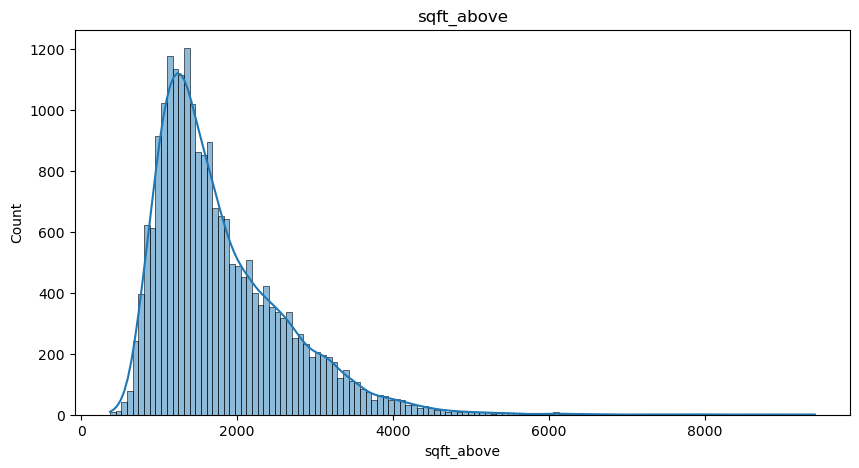

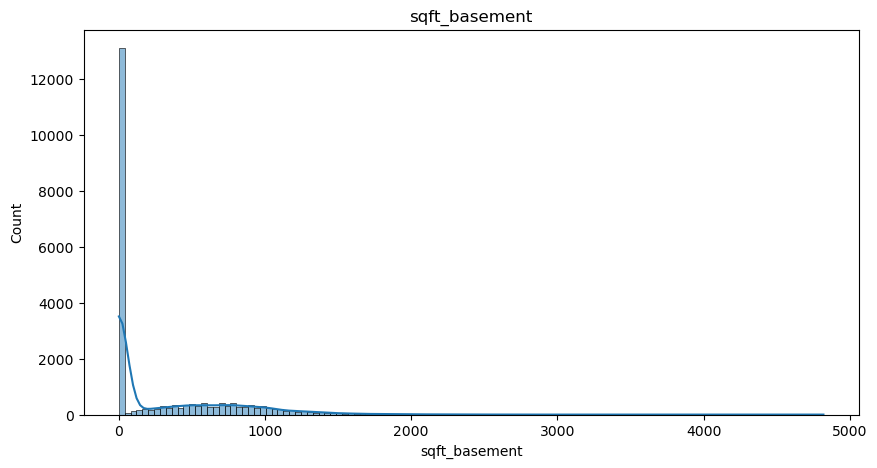

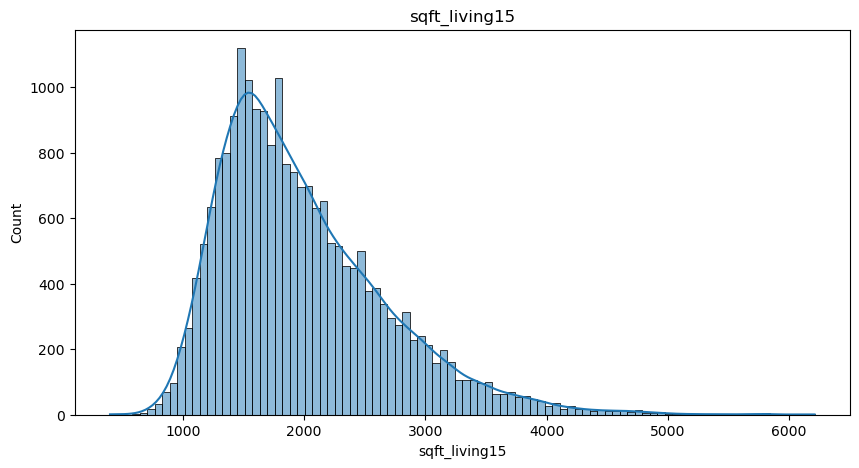

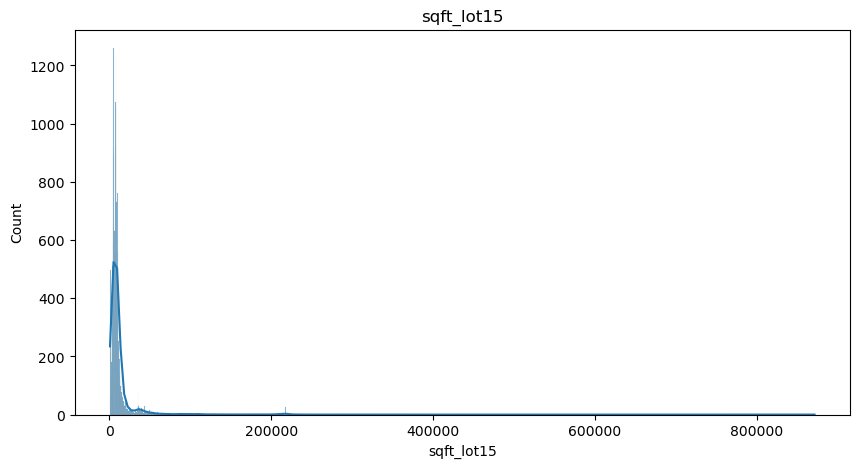

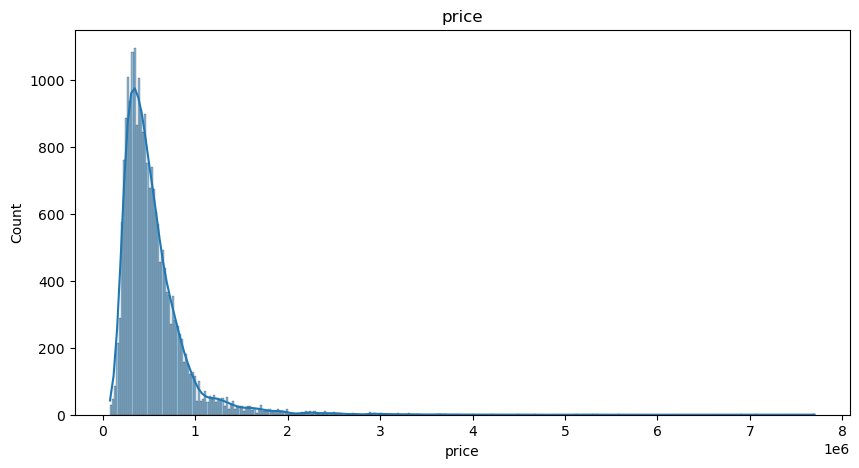

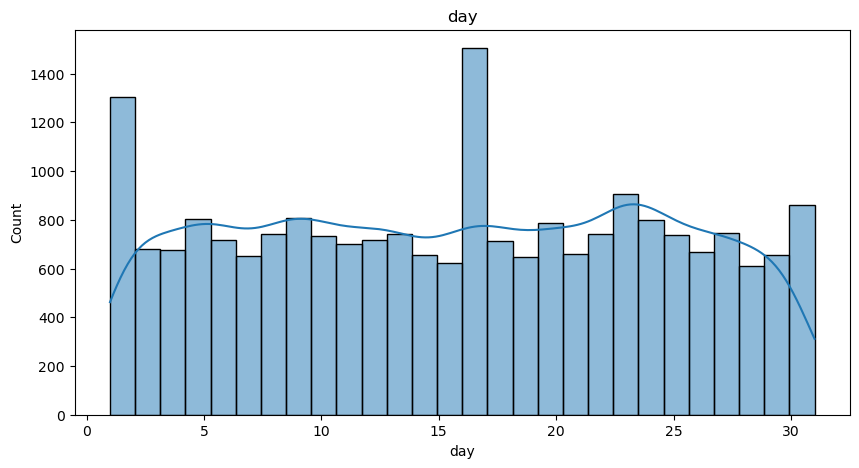

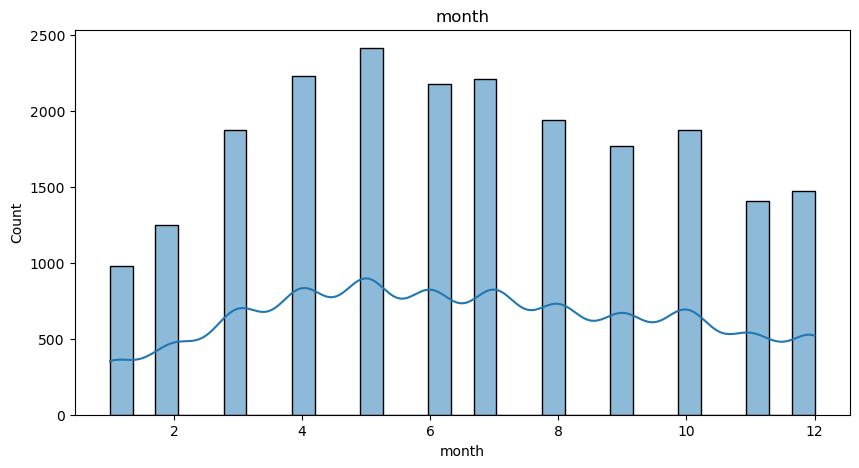

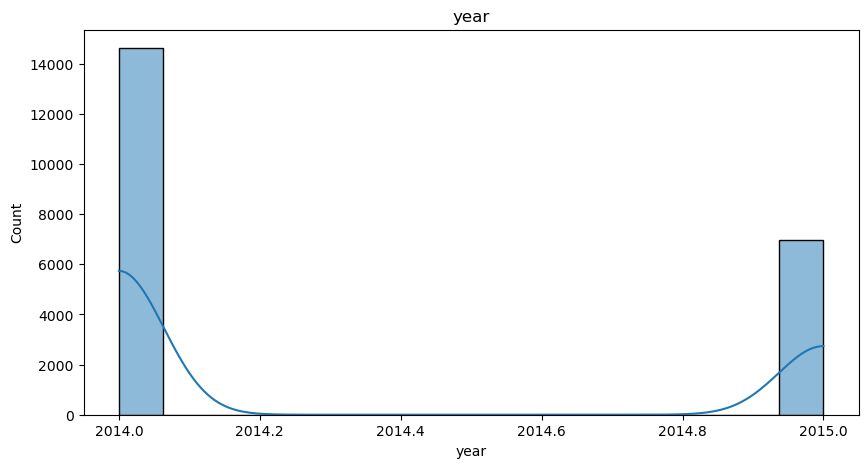

In [86]:
#Now, I will plot the distribution of the numerical columns
for i in numerical.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(numerical[i], kde=True)
    plt.title(i)
    plt.show()

From the plots, we can se some things:

- sqft_living, sqft_living15, sqft_above and price are normally distributed, with a little bit of skewnes to the left, indicating the pressence of outliers on the higher values.

- sqft_lot, sqft_basement and sqft_lot15 have high peaks at 0, meaning that a lot of houses don't have a lot or basement.

- For the other values, we can see that, having that low unique values, the graph doesn't give much information.

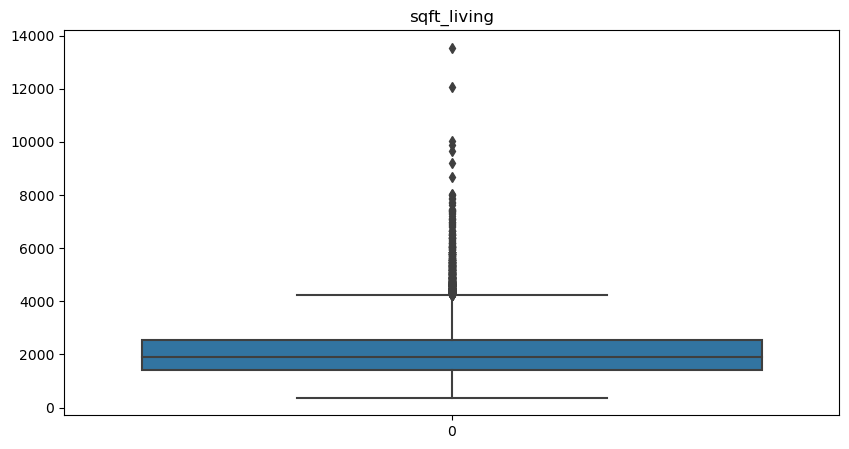

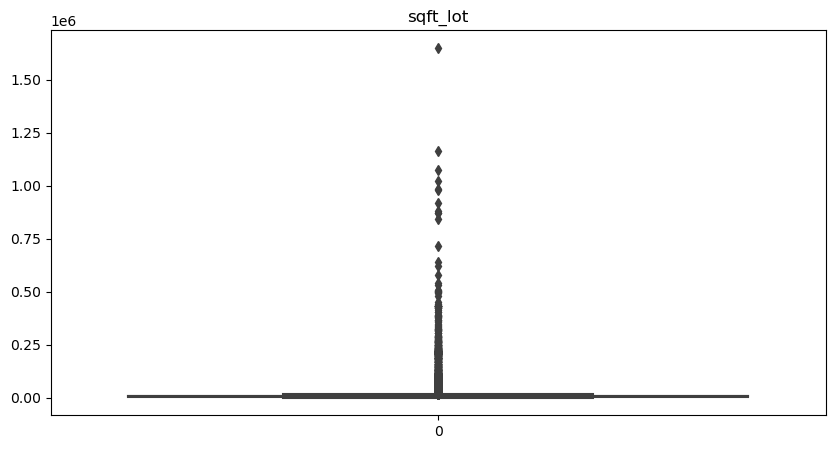

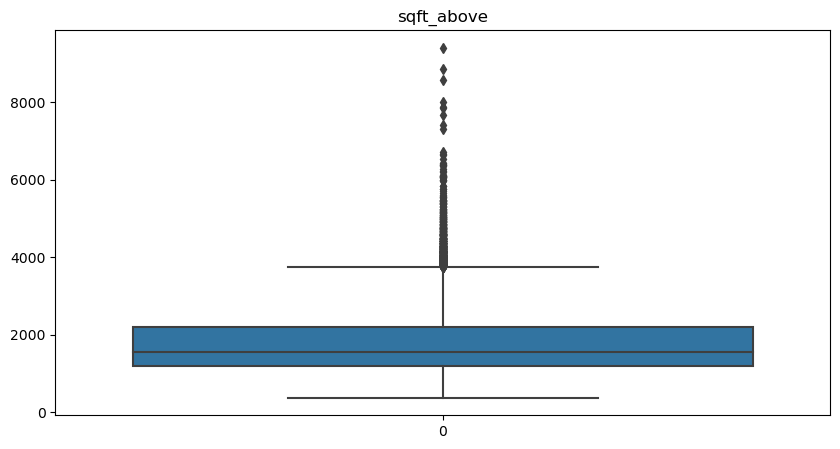

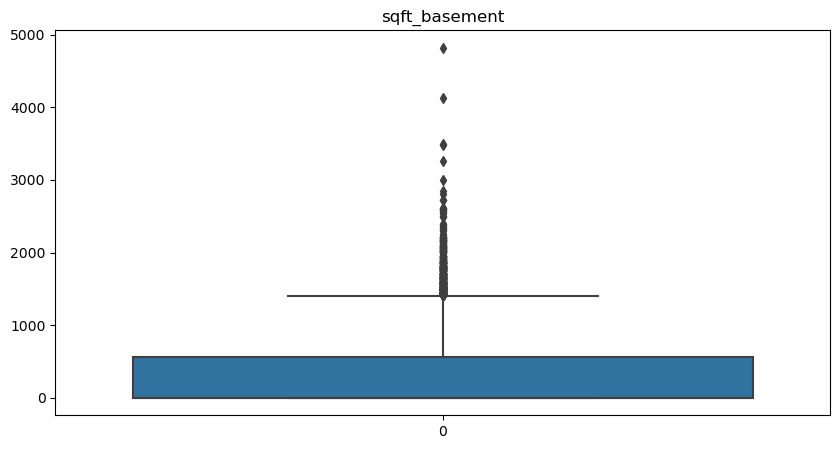

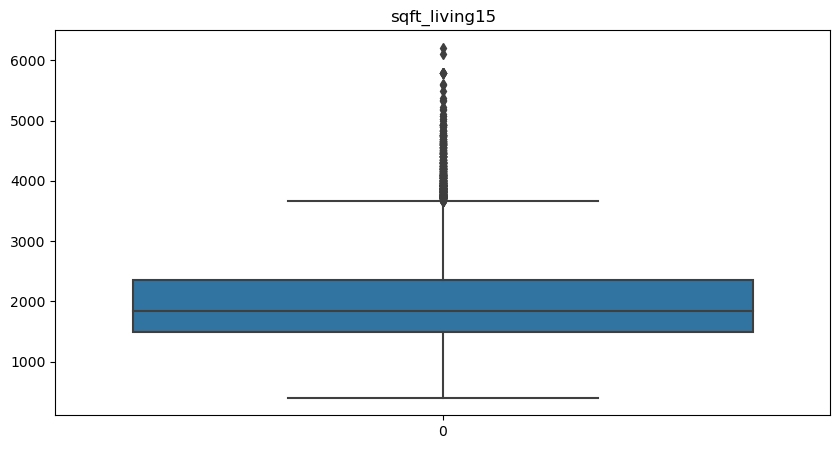

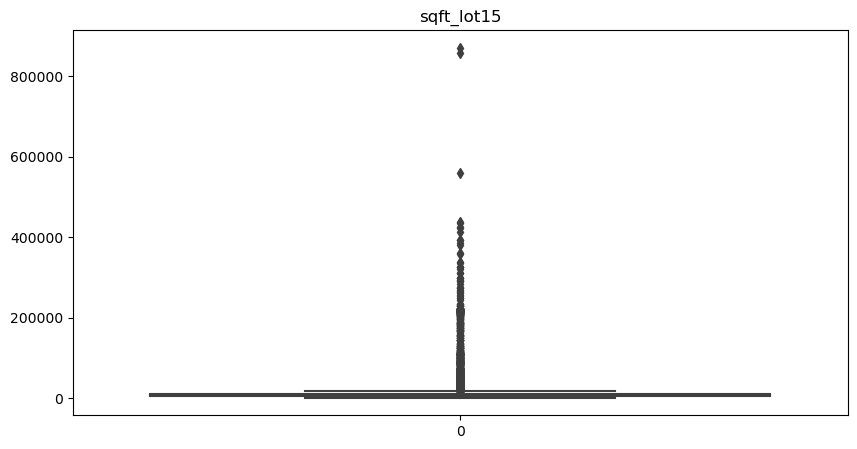

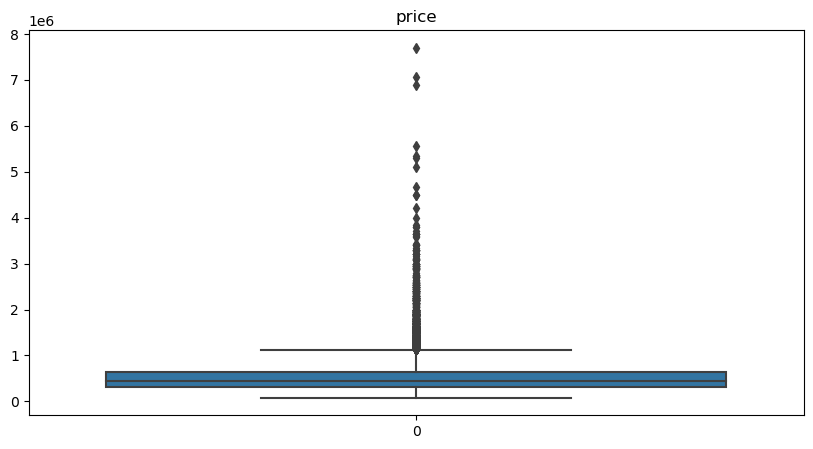

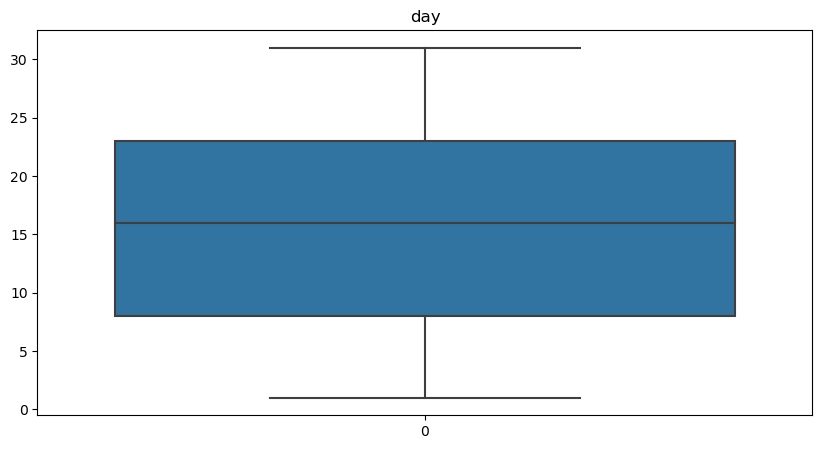

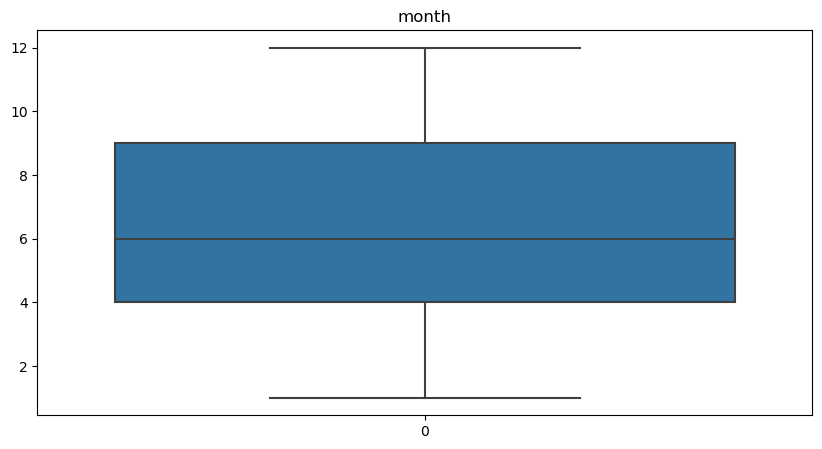

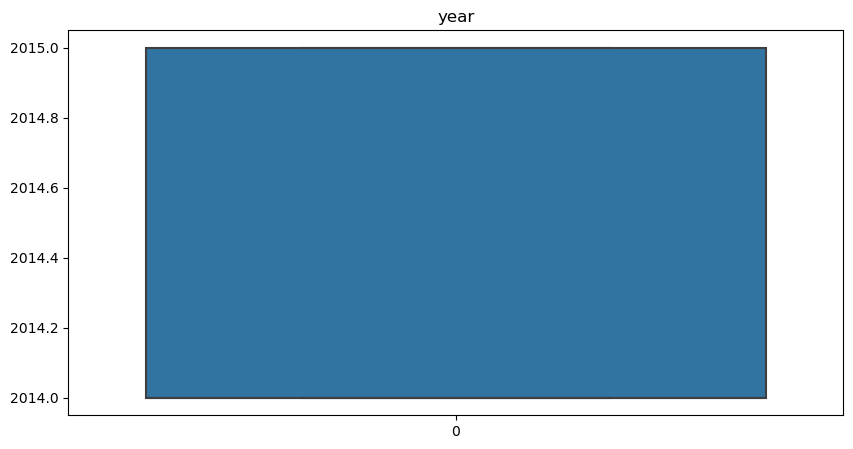

In [87]:
#Next, I will plot numerical with boxplots, to check for outliers
for i in numerical.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(numerical[i])
    plt.title(i)
    plt.show()

At first glance, we can see that there are a lot of outliers in the features.

Taking a closer look, we can get:

- sqft_lot and sqft_lot15 both have the box and the whiskers in 0, with everything else counted as an outlier.
- Everything, included price, finds its IQR and median towards the lower values.


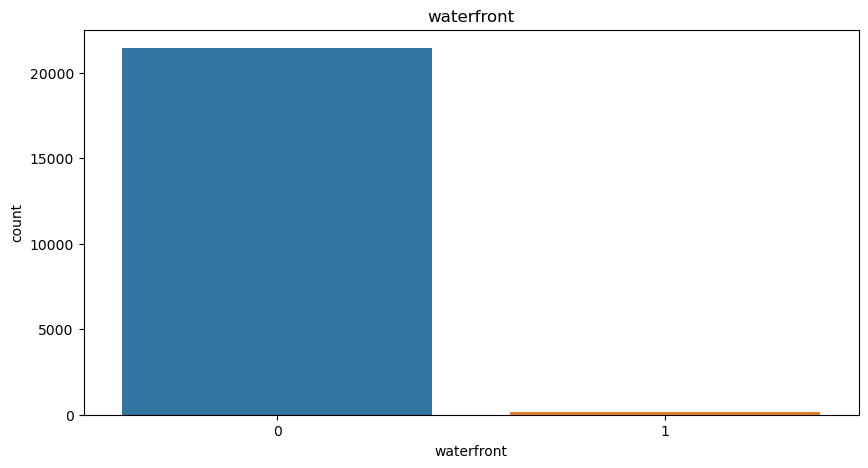

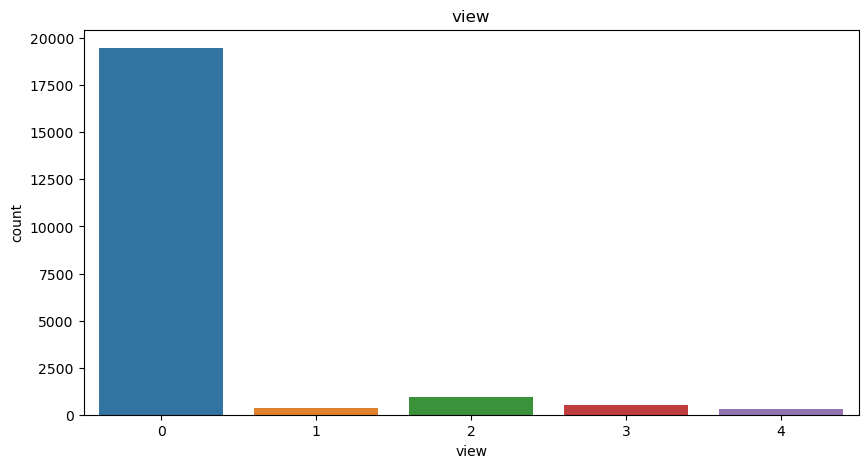

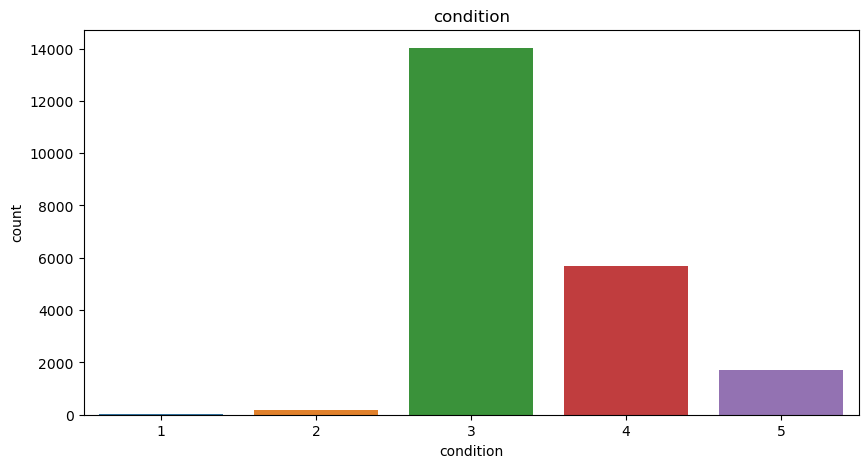

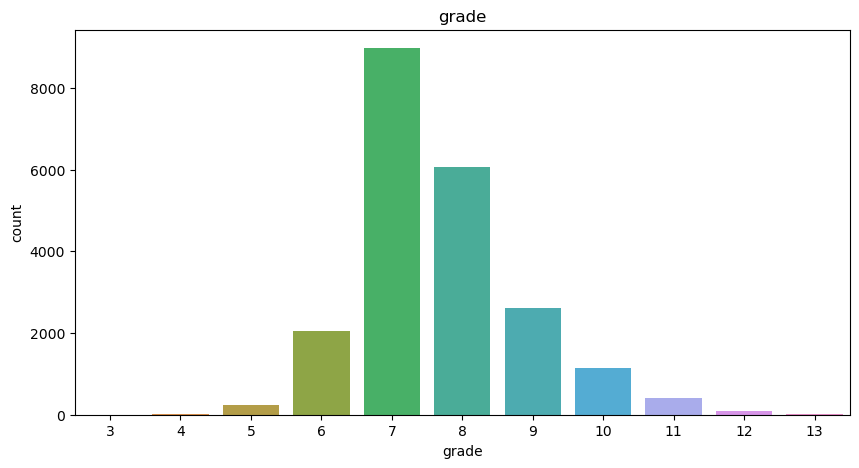

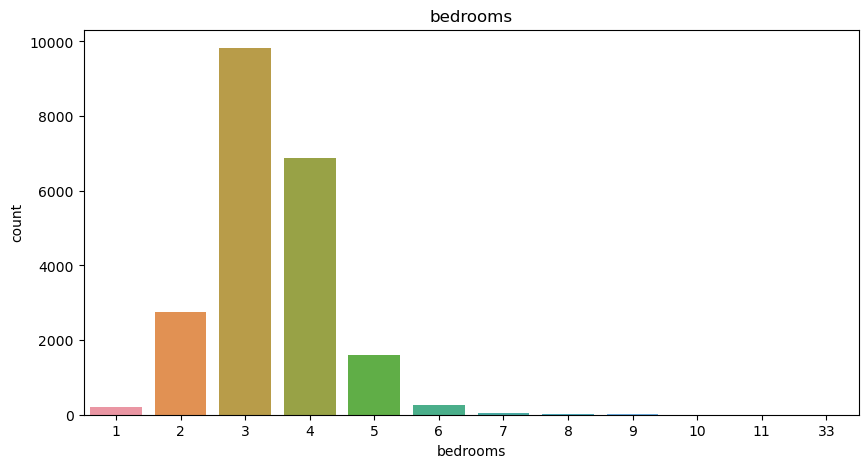

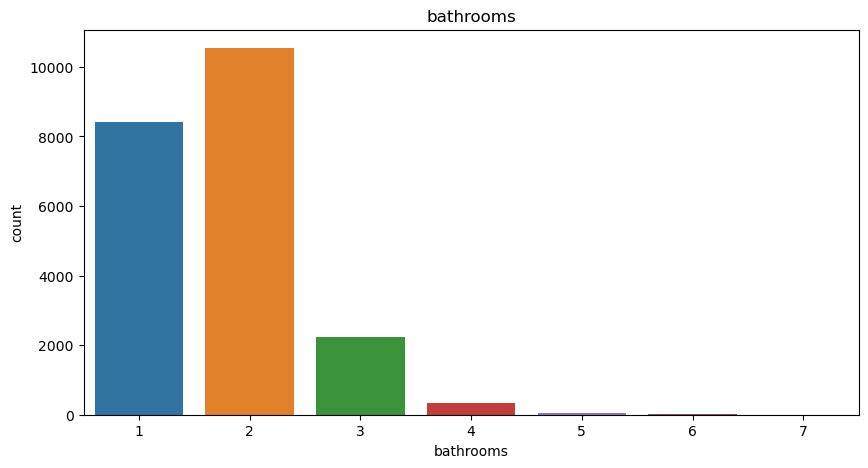

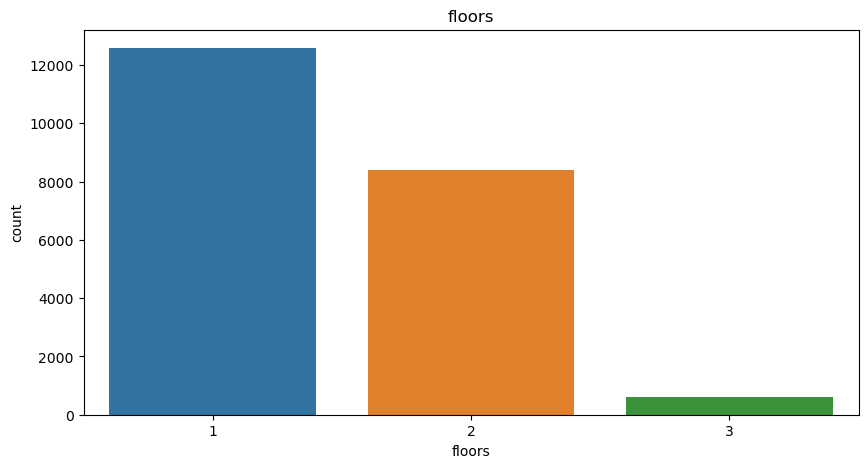

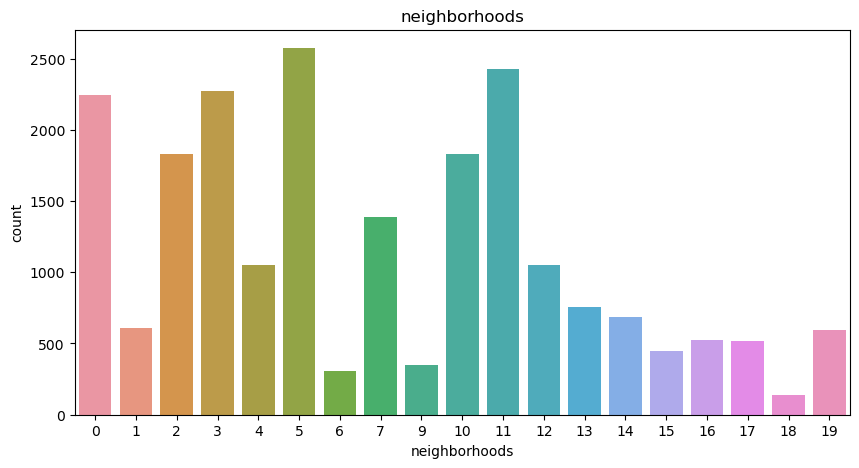

In [88]:
#Now, I will plot the categorical columns using barplots to get a first look at the data, dropping zipcode, year built and year renovated as they have too many unique values
for i in categorical.drop(['yr_built', 'yr_renovated'], axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=categorical[i].value_counts().index, y=categorical[i].value_counts())
    plt.title(i)
    plt.show()

Loooking at the plots we can get that:

- The grat majority of the houses don't have a view of a waterfront
- Most of the houses are at condition 3, so they are in good condition, but may need some renovations.
- The majority of the houses don't have appealing views.
- A big part of the houses are graded 7 or 8, no houses are graded 3 or les and only some houses are graded 12 or 13. So the majority of the houses are in good conditions.

Later with Tableau, we will make more insightful plots, so we can tell a better story about the data.

0.7019173021377595


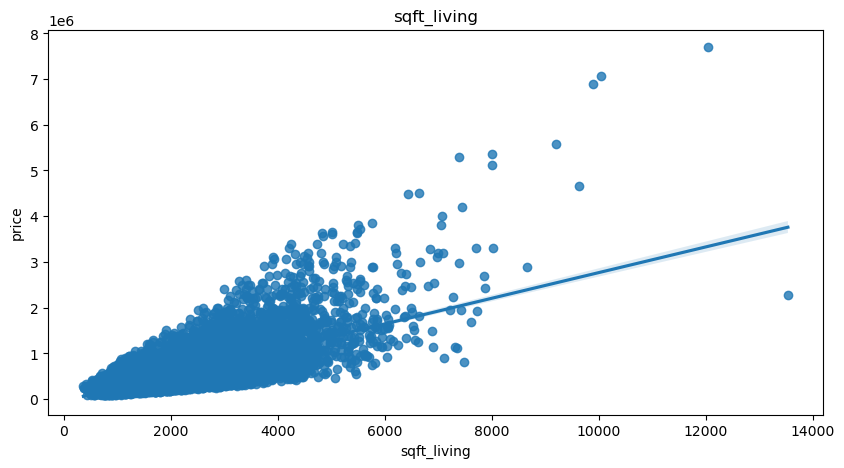

0.08987622099083867


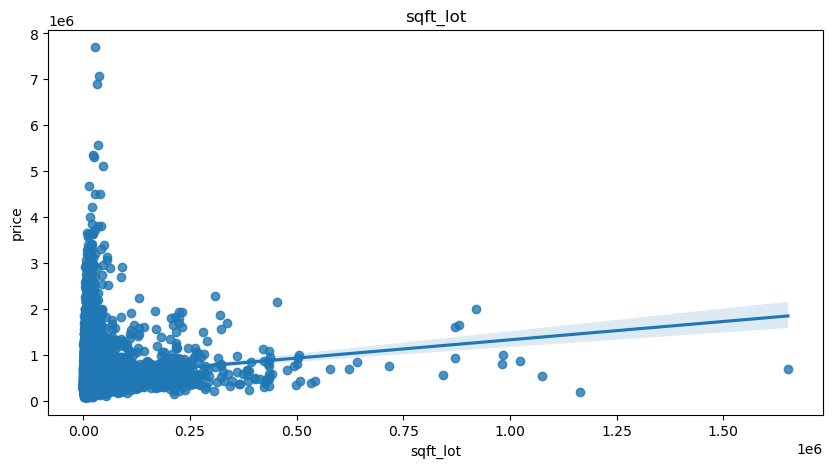

0.6053679437051804


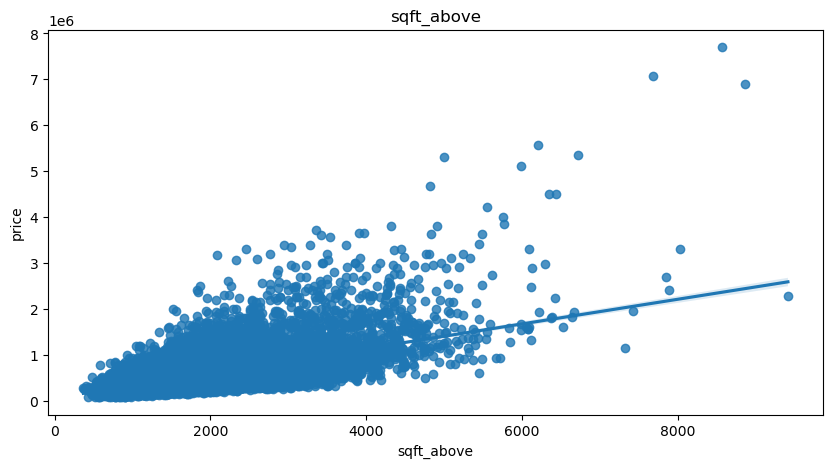

0.3237989068990473


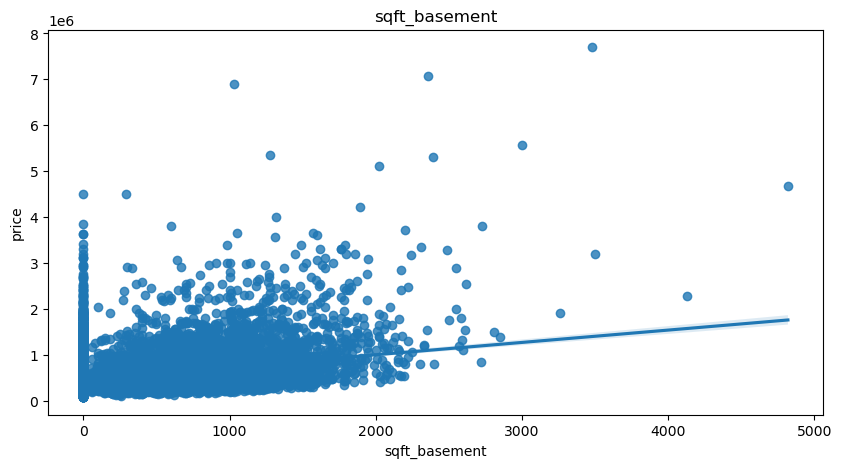

0.5852412017040663


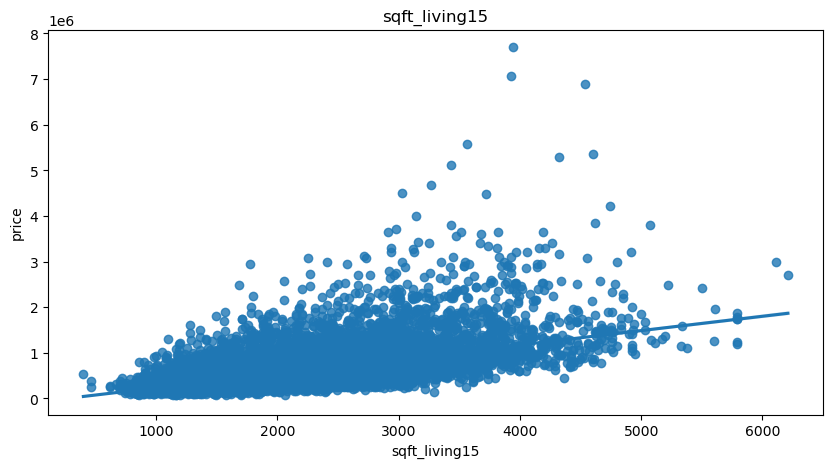

0.08284493117496435


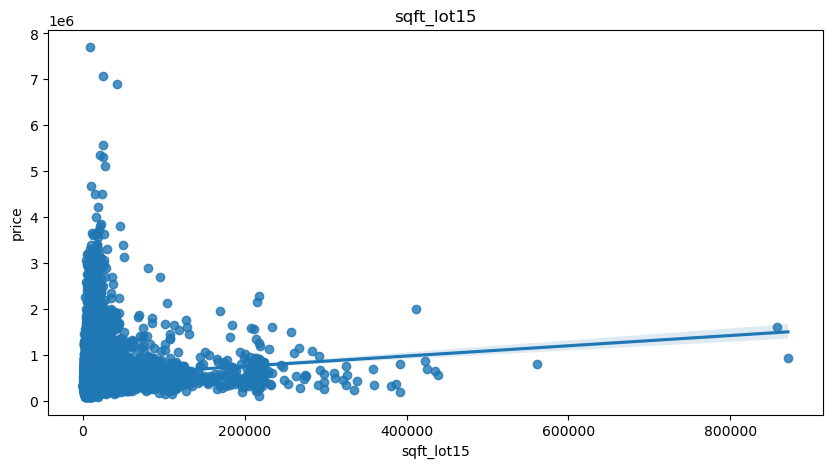

-0.014684301605392419


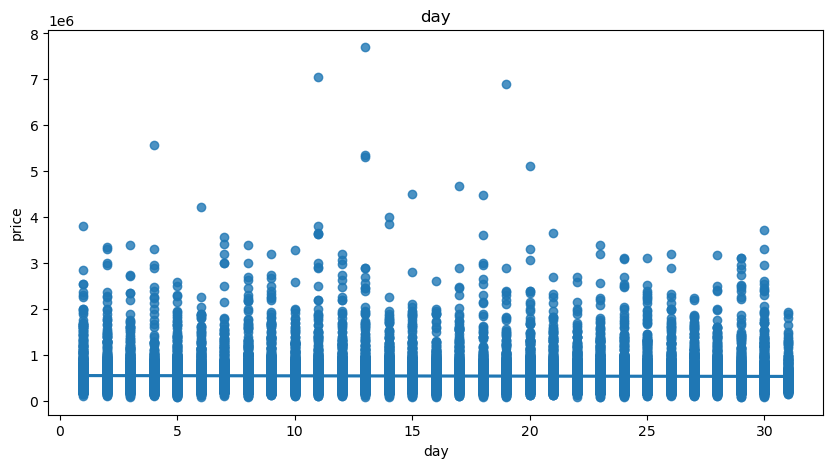

-0.009928289245273962


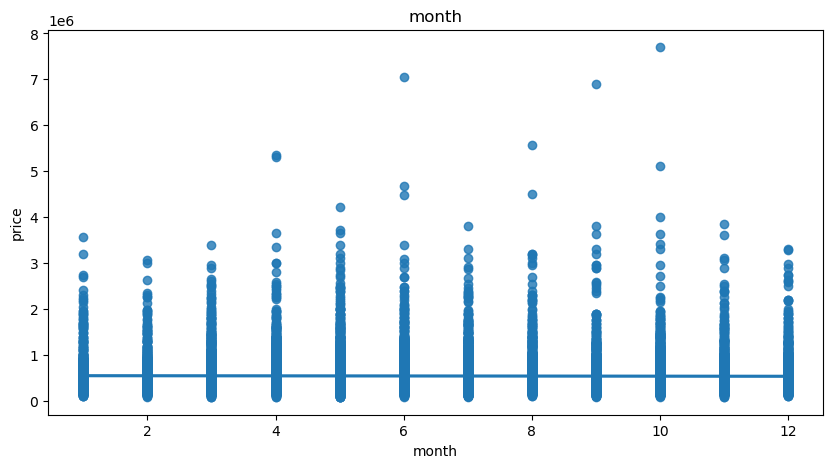

0.003727139624315465


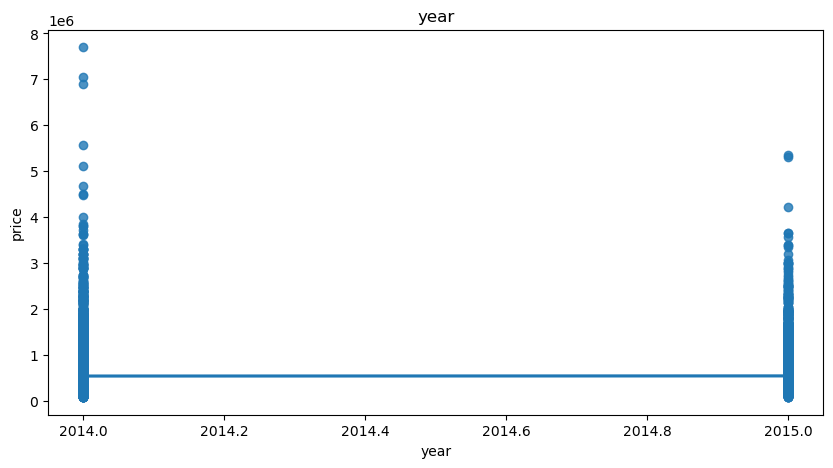

In [89]:
#the next step will be to check the relationship between the numerical columns and the target, price
for i in numerical.drop(['price'], axis=1).columns:
    print(numerical[i].corr(numerical['price']))
    plt.figure(figsize=(10,5))
    sns.regplot(x=numerical[i], y=numerical['price'])
    plt.title(i)
    plt.show()

The correlation with the target is:  0.2663984562473044


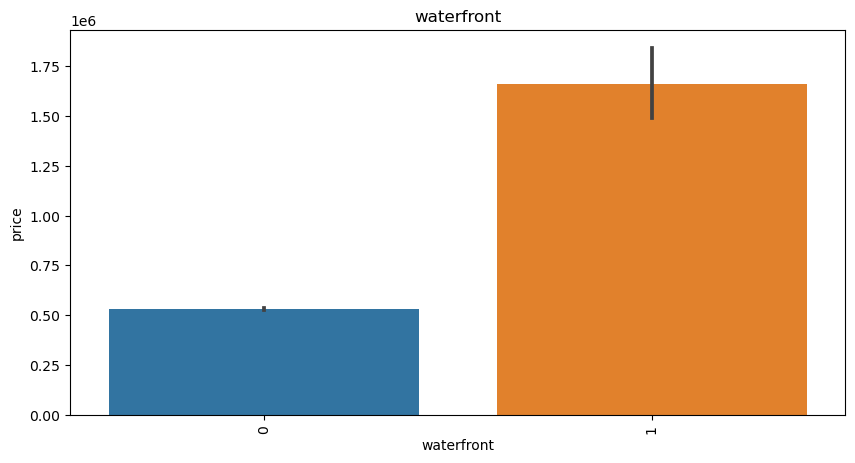

The correlation with the target is:  0.3973703029476877


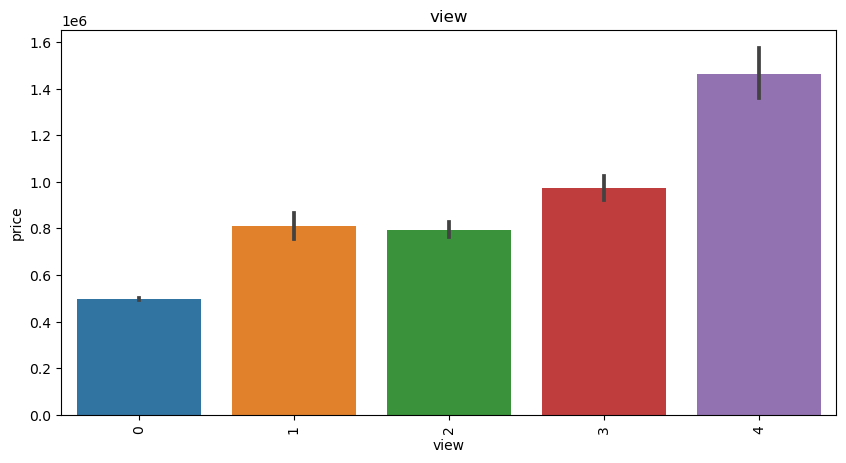

The correlation with the target is:  0.036056375486094944


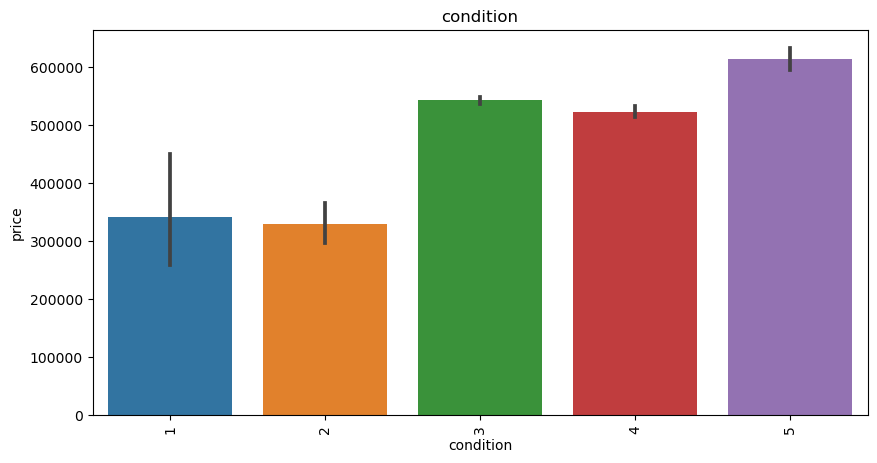

The correlation with the target is:  0.6679507713876465


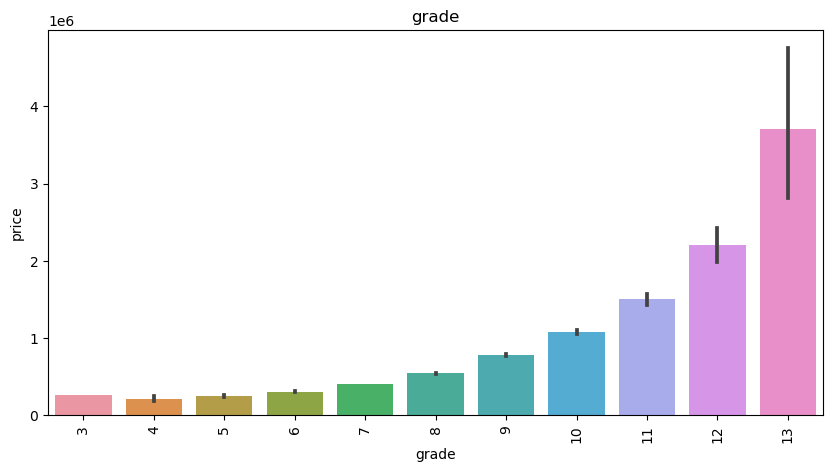

The correlation with the target is:  0.05395333346519119


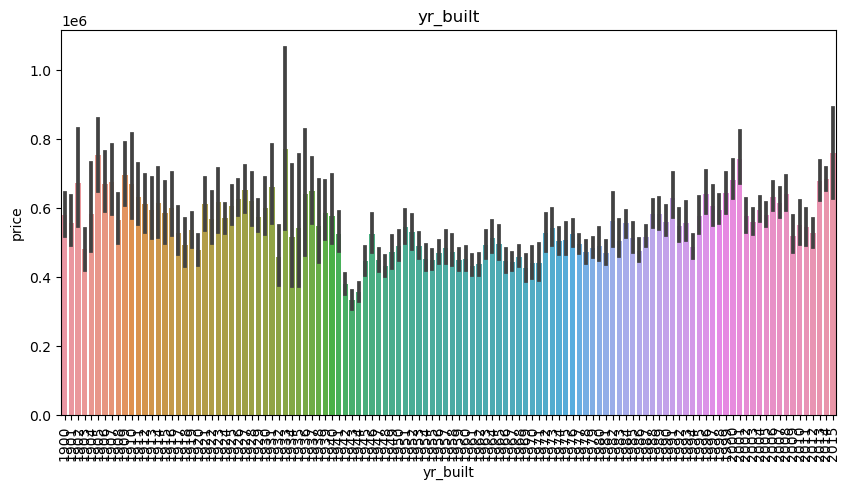

The correlation with the target is:  0.12642362379314492


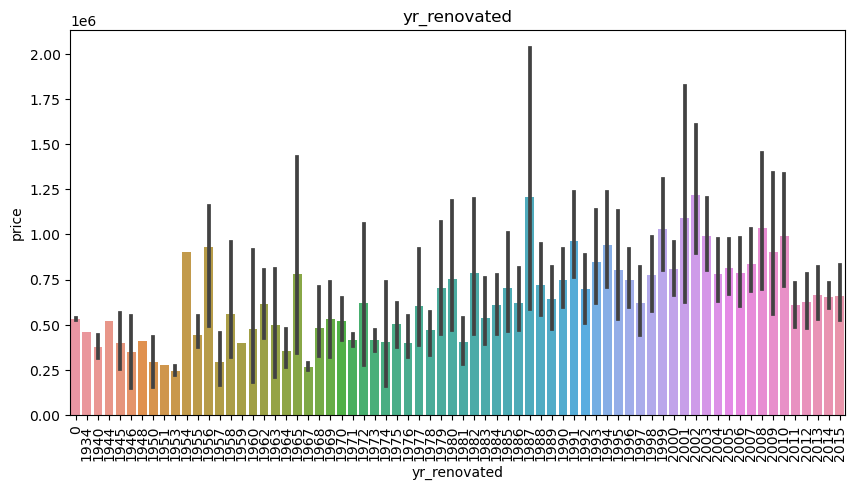

The correlation with the target is:  0.30878747195653244


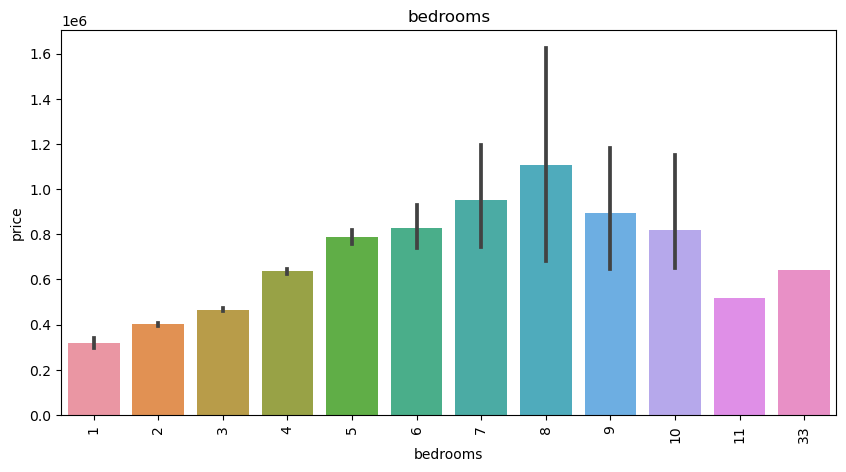

The correlation with the target is:  0.5105502123995256


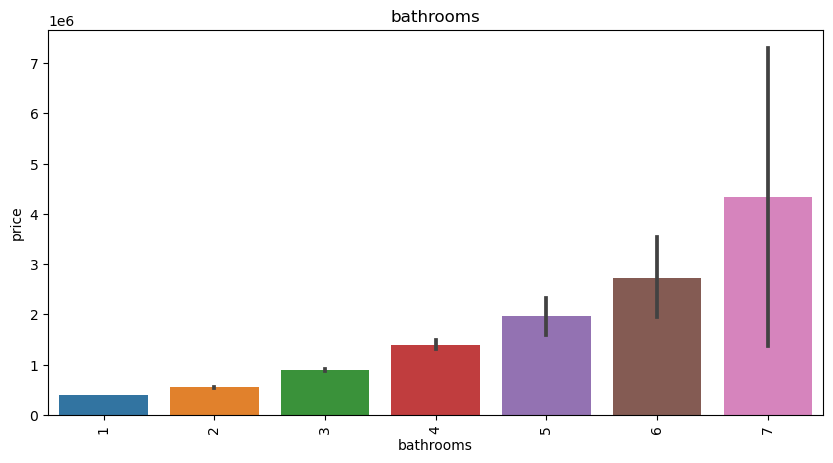

The correlation with the target is:  0.23726437379976312


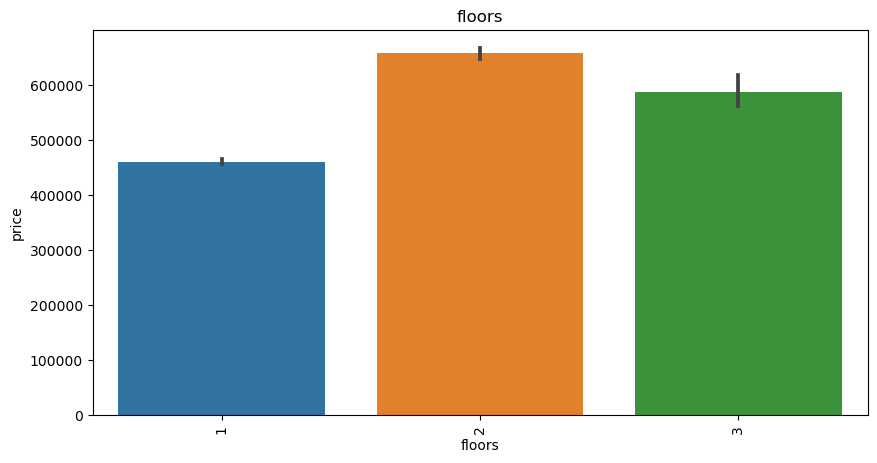

The correlation with the target is:  -0.05353547415945053


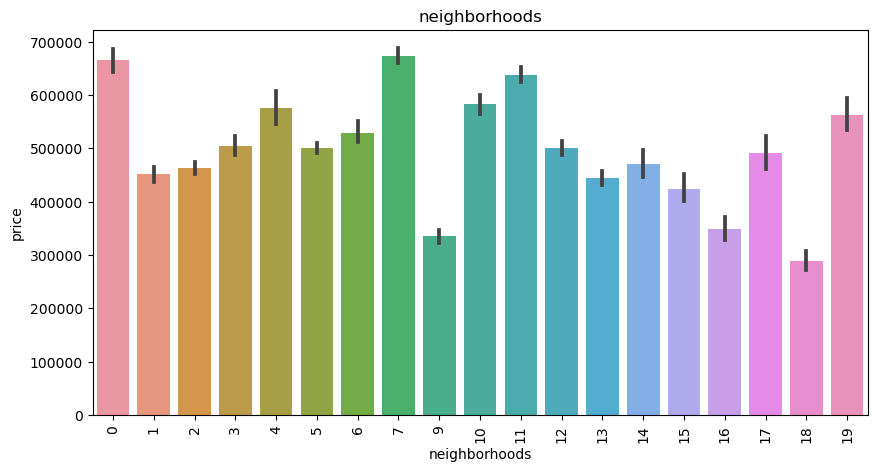

In [90]:
#Now, we will do the same with the categorical columns
for i in categorical.columns:
    print('The correlation with the target is: ', categorical[i].corr(data['price']))
    plt.figure(figsize=(10,5))
    sns.barplot(x=categorical[i], y=data['price'])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

From checking the relationships, we can get some insights:

- Regarding the numerical columns, we have a lot of outliers, as we saw previously, and maybe they will affect the model. Even though we have those outliers, the sqft columns are prety clusterd on the line.
- For the categorical columns, most of the results are mostly reliable, with waterfront 1 and condition 1 have bigger variances and are less reliable.

In [91]:

#Now I will create a benchmark model to then work on which features to use, work with, modify or remove entirely.
#For that purpose, I will use a linear regression model, as it is the simplest model to use.

#First, I will split the data into X and y
X = data.drop(['id', 'price','date'], axis=1)
y = data['price']

#Now, I will split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Now I will create the model and train and test it
model = LinearRegression()
model.fit(X_train, y_train)

#Now, I will check the results of the model to get some metrics
print("R2:", model.score(X_test, y_test))
print("MAE:", mean_absolute_error(model.predict(X_test), y_test))
print("RMSE:", mean_squared_error(model.predict(X_test), y_test, squared=False))


R2: 0.6953487587204304
MAE: 125000.31166921642
RMSE: 199174.6755271778


<Axes: xlabel='price'>

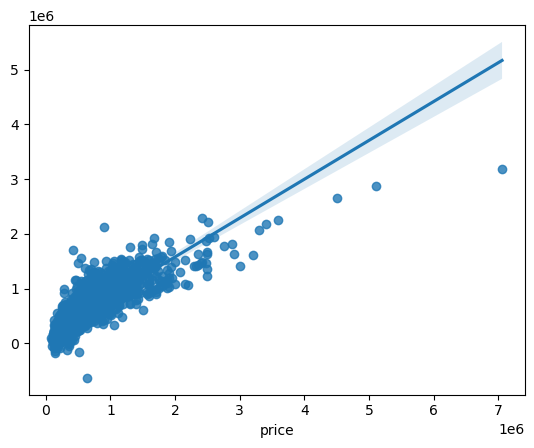

In [92]:
#Plotting the results of the model
sns.regplot(x=y_test, y=model.predict(X_test))

From the results of the benchmark model, we can get that there's a lot of work to do. We can see that everything is clustered around the lower levels and scatters the further we go.

I will perform some feature selection and feature engineering to check if it improves the model.

In [93]:
#Because we have a lot of outliers, I will try first log transofrmation, and then standard scaling to see if the results improve
#First, I will log transform the numerical values
numerical_log = numerical
numerical_log = numerical_log.apply(lambda x: np.log(x+1))


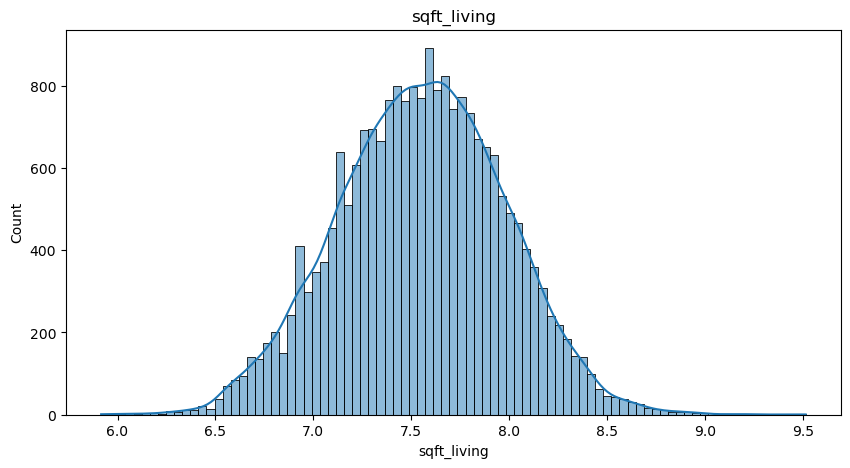

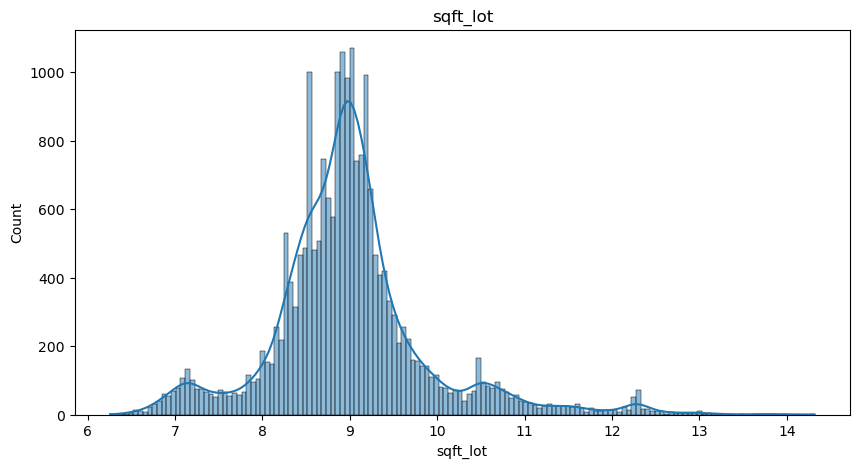

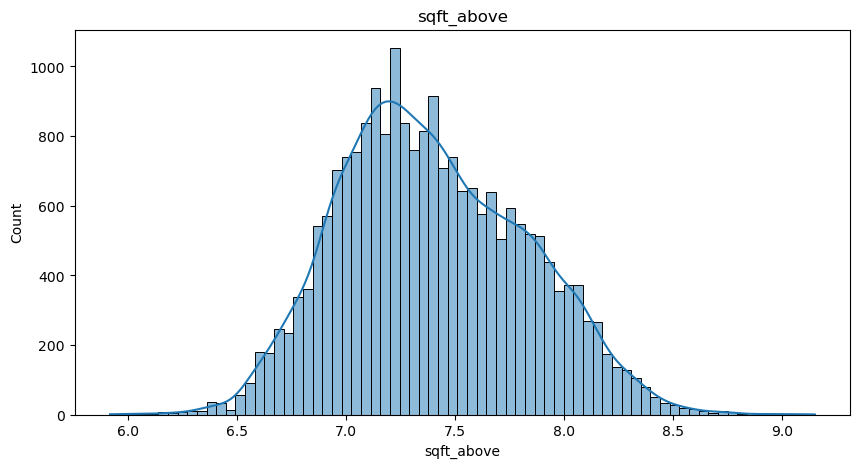

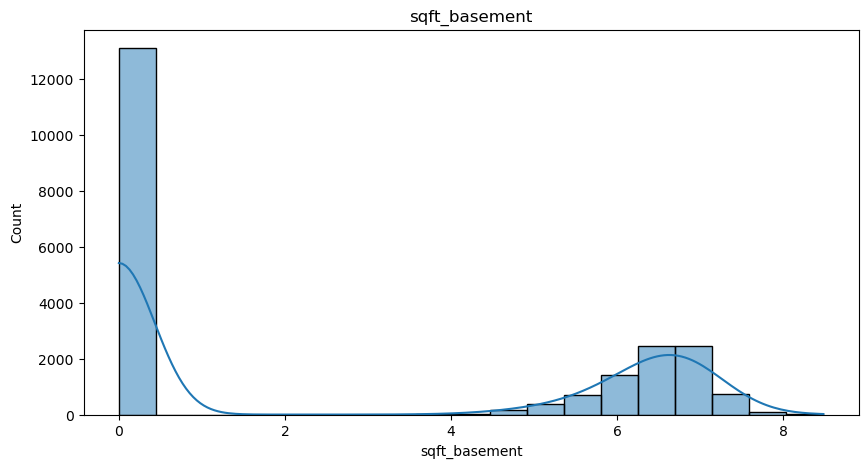

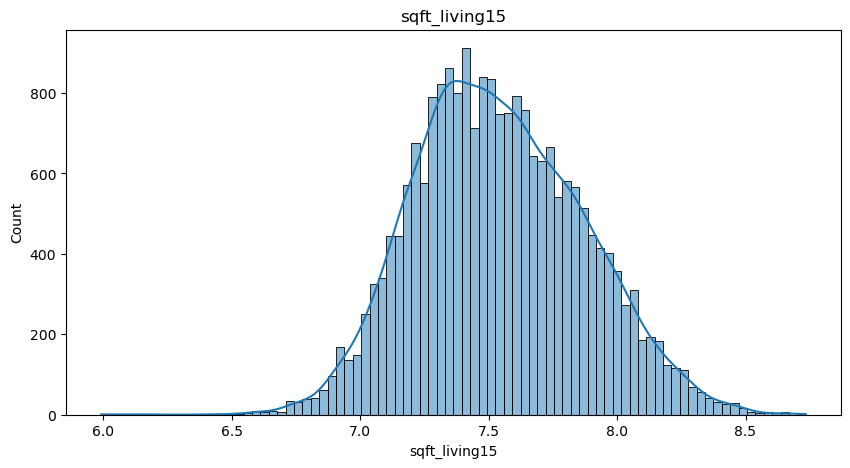

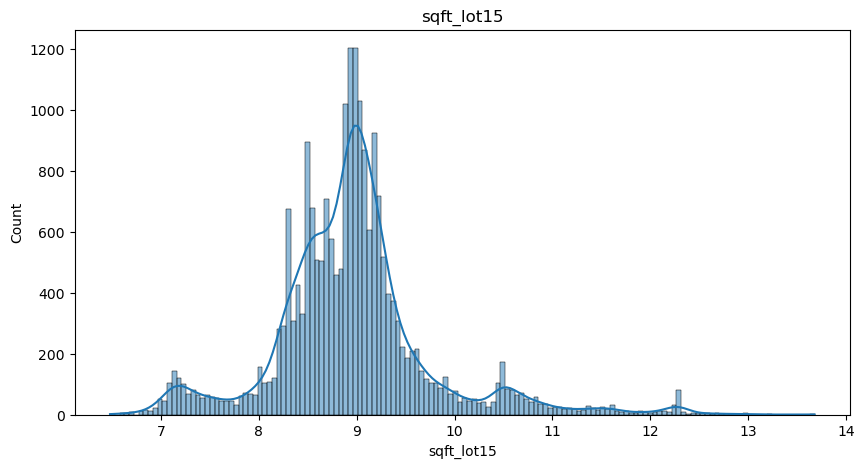

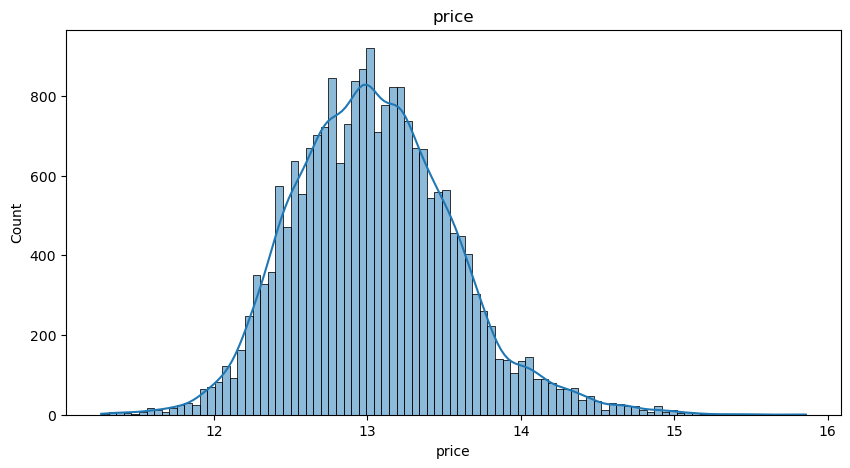

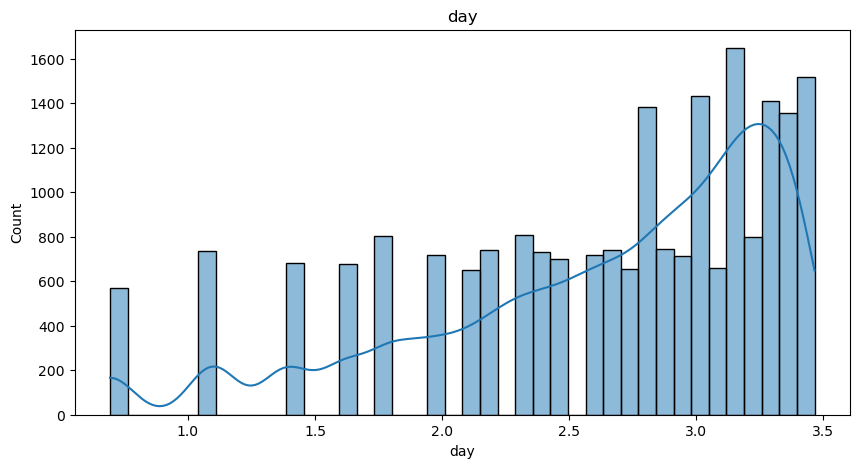

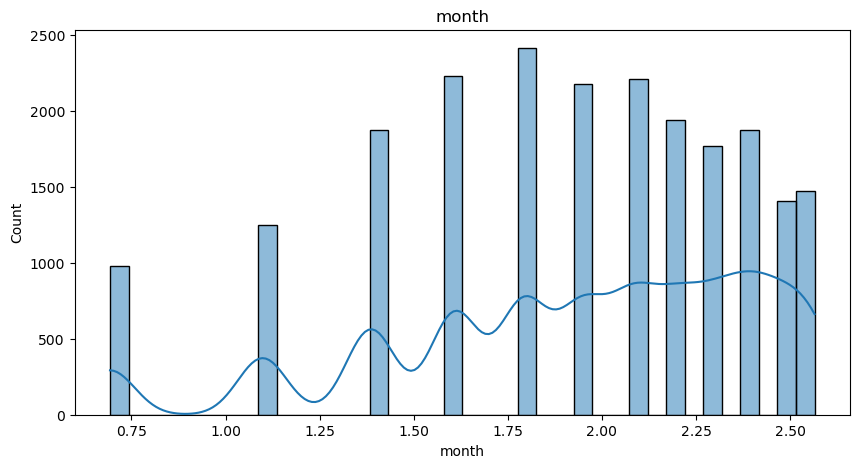

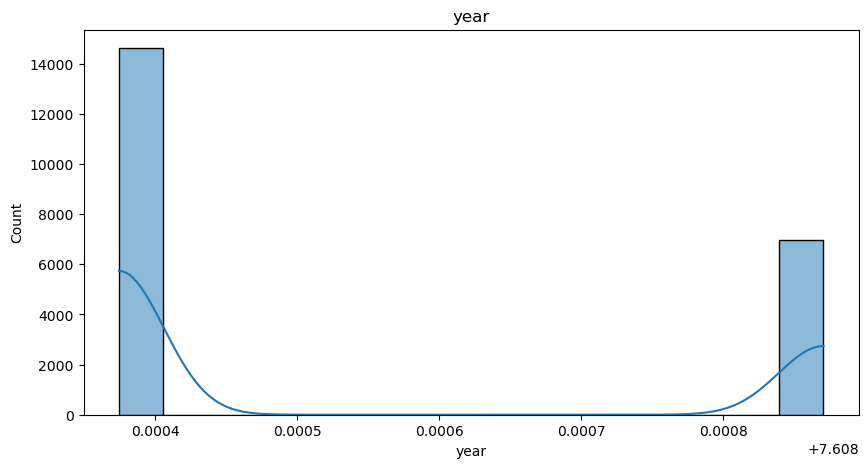

In [94]:
#Plotting the distribution of the log transformed data
for i in numerical_log.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(numerical_log[i], kde=True)
    plt.title(i)
    plt.show()

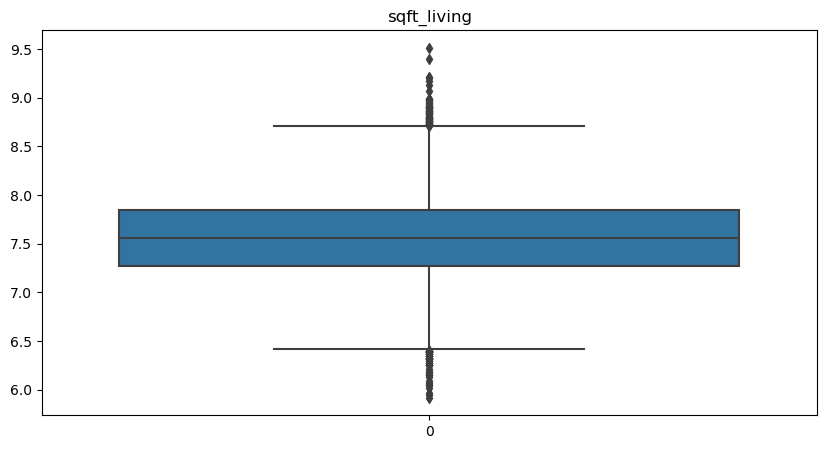

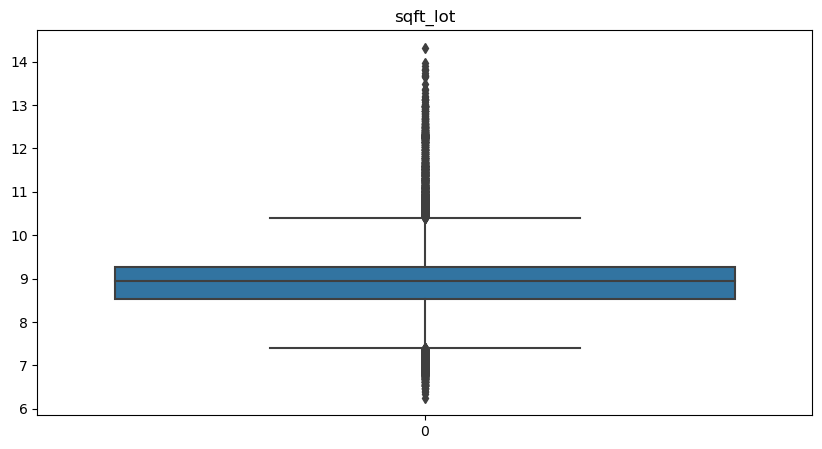

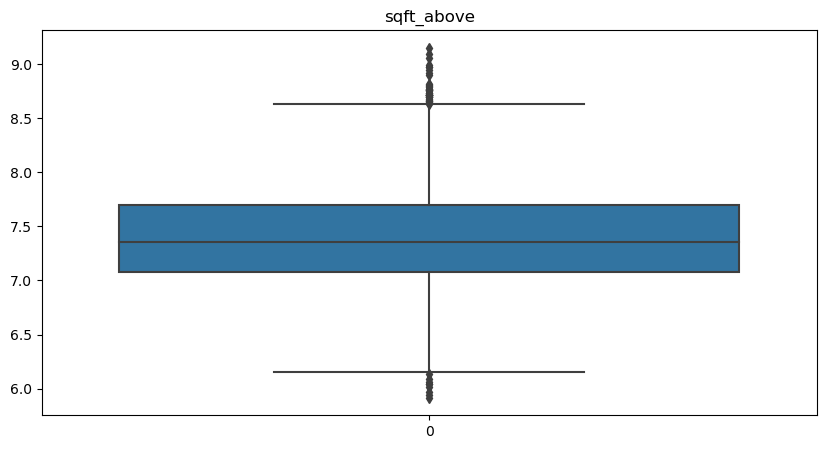

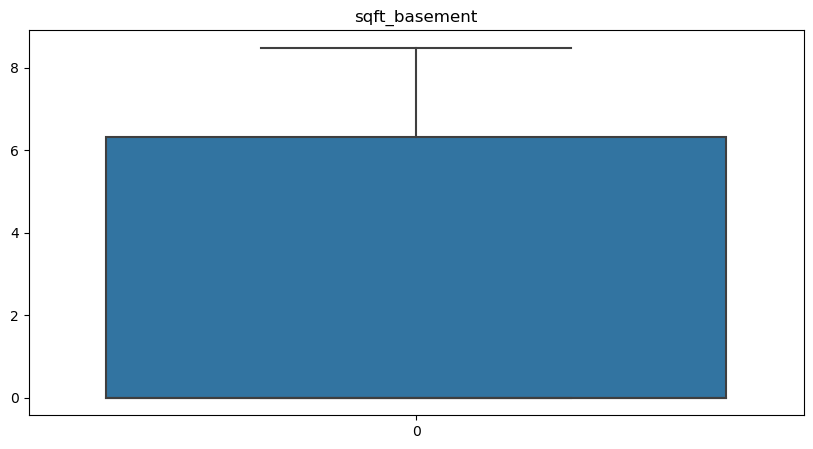

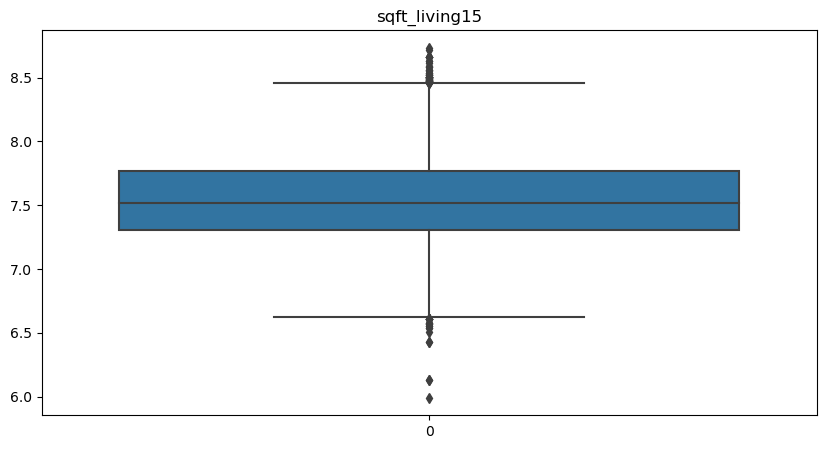

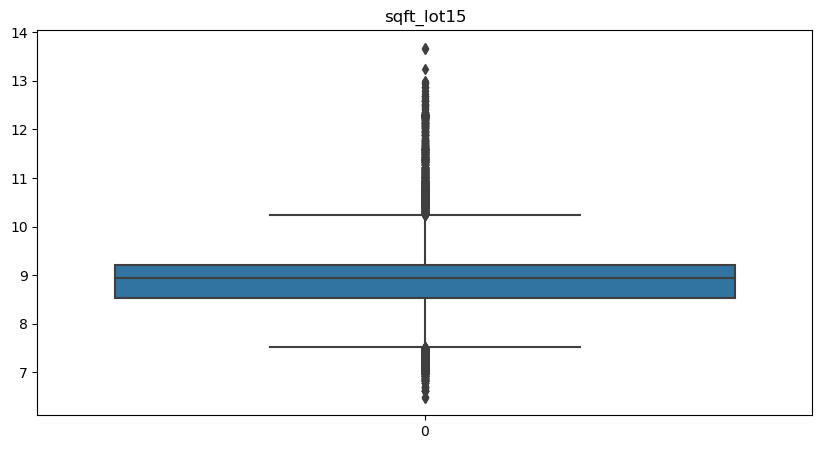

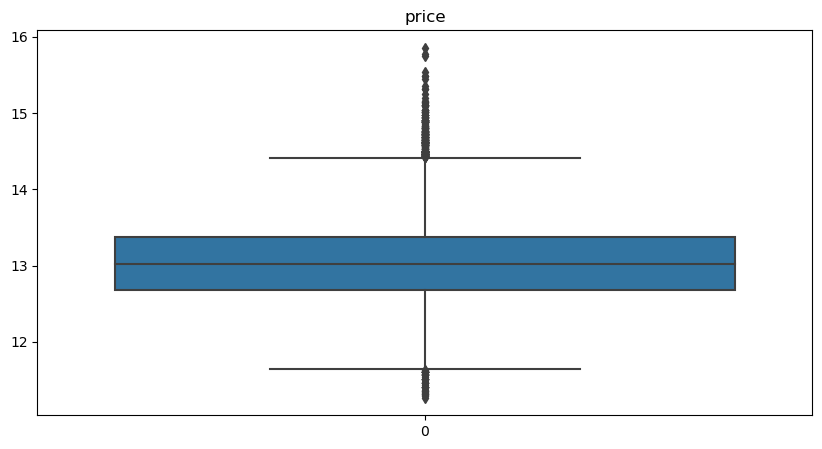

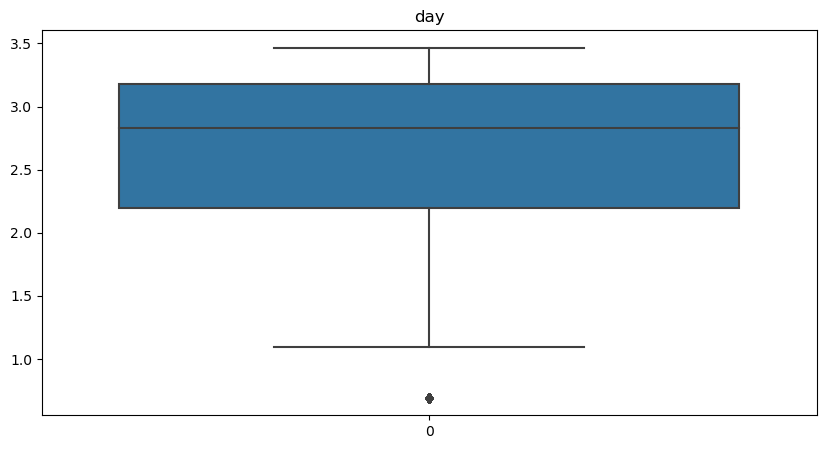

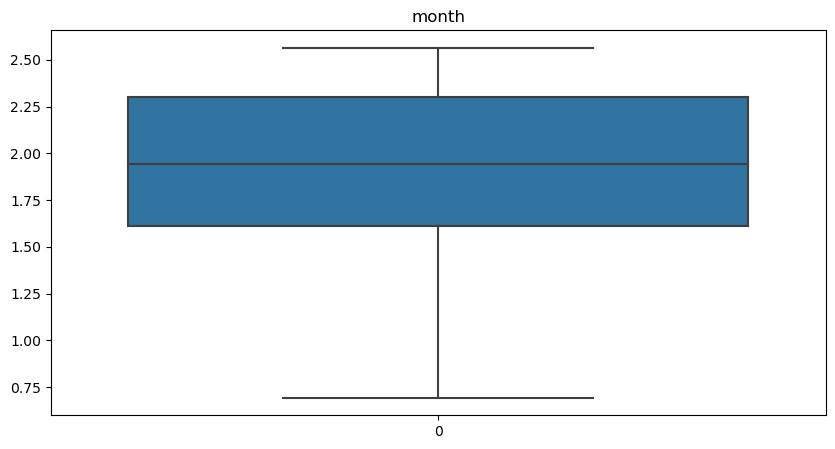

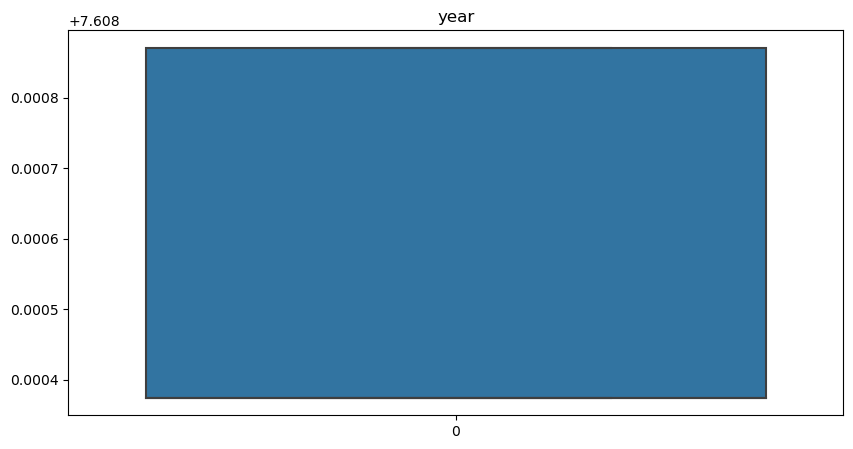

In [95]:
#Now, I will plot the log transformed numerical columns with boxplots, to check for outliers
for i in numerical_log.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(numerical_log[i])
    plt.title(i)
    plt.show()

There are still outliers, but the values have moved towards the center and reduced the amount of outliers in almost every column. Next, I will try to test the model with the modified values.

In [96]:
#Checking the results of the log transformation
X = numerical_log.drop(['price'], axis=1)
y = numerical_log['price']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.5017498747097058
MAE: 158515.56776261033
RMSE: 265194.1695943487


Even though I think that log will be the best option, I will try to test with other techniques, just in case we get better results.

In [97]:
#Now I will try standard scaling the data
numericals_ = numerical
X = numericals_.drop(['price'], axis=1)
y = numericals_['price']

X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_transformer = StandardScaler()
X_transformer.fit(X_train_num)

# saving in a pickle
with open(r'C:\Users\Samu\Documents\Ironhack\House-Price-Prediction\files\std_transformer.pickle', 'wb') as file:
    pickle.dump(X_transformer, file)

# loading from a pickle
with open(r'C:\Users\Samu\Documents\Ironhack\House-Price-Prediction\files\std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_std = loaded_transformer.transform(X_train_num)
X_test_std = loaded_transformer.transform(X_test_num)


In [98]:
#Testing the model with the standard scaled data
lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

R2: 0.49823179593505573
MAE: 169590.73605751374
RMSE: 255613.74965466998


In [99]:
#And now, testing normalizer to see if the results improve
X = numericals_.drop(['price'], axis=1)
y = numericals_['price']

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)

In [100]:
#Testing the model with the normalized data
lr = LinearRegression()
lr.fit(X_train_norm, y_train)
lr.score(X_test_norm, y_test)
print("R2:", lr.score(X_test_norm, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_norm), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_norm), y_test, squared=False))


R2: 0.27470680655601576
MAE: 192066.52480742082
RMSE: 307319.0225837752


After trying the different scaling techniques, we will choose log, as it has the best results. But StandardScaler is close, so maybe it will be nice to give it a shot.

On the categorical side, I don't think is necessary the use of scaling techniques, as it is fairly even.

In [101]:
#Creating the test features to use in the model:
test_numerical = numerical
test_categorical = categorical
target = data['price']

In [102]:
test_categorical.head()

,waterfront,view,condition,grade,yr_built,yr_renovated,bedrooms,bathrooms,floors,neighborhoods
0,0,0,3,7,1955,0,3,1,1,17
1,0,0,3,7,1951,1991,3,2,2,12
2,0,0,3,6,1933,0,2,1,1,2
3,0,0,5,7,1965,0,4,3,1,13
4,0,0,3,8,1987,0,3,2,1,7


In [103]:
test_numerical.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,day,month,year
0,1180,5650,1180,0,1340,5650,221900,13,10,2014
1,2570,7242,2170,400,1690,7639,538000,9,12,2014
2,770,10000,770,0,2720,8062,180000,25,2,2015
3,1960,5000,1050,910,1360,5000,604000,9,12,2014
4,1680,8080,1680,0,1800,7503,510000,18,2,2015


In [104]:
#Applying the log transformation to the final numerical data
test_numerical = test_numerical.apply(lambda x: np.log(x+1))

In [105]:
#Concanating the final numerical and categorical data
test_data = pd.concat([test_numerical, test_categorical], axis=1)

In [106]:
test_data.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,day,month,year,waterfront,view,condition,grade,yr_built,yr_renovated,bedrooms,bathrooms,floors,neighborhoods
0,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588,12.309987,2.639057,2.397895,7.608374,0,0,3,7,1955,0,3,1,1,17
1,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153,13.195616,2.302585,2.564949,7.608374,0,0,3,7,1951,1991,3,2,2,12
2,6.647688,9.210440,6.647688,0.000000,7.908755,8.995041,12.100718,3.258097,1.098612,7.608871,0,0,3,6,1933,0,2,1,1,2
3,7.581210,8.517393,6.957497,6.814543,7.215975,8.517393,13.311331,2.302585,2.564949,7.608374,0,0,5,7,1965,0,4,3,1,13
4,7.427144,8.997271,7.427144,0.000000,7.496097,8.923191,13.142168,2.944439,1.098612,7.608871,0,0,3,8,1987,0,3,2,1,7


In [107]:
#Creating a Linear Regression model with the final features and get some predictions
X = test_data.drop(['price'], axis=1)
y = test_data['price']

X.columns = X.columns.astype(str)  # Convert feature names to strings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))


R2: 0.6474016793210828
MAE: 0.2462523064831316
RMSE: 0.30988784946378667


<Axes: xlabel='price'>

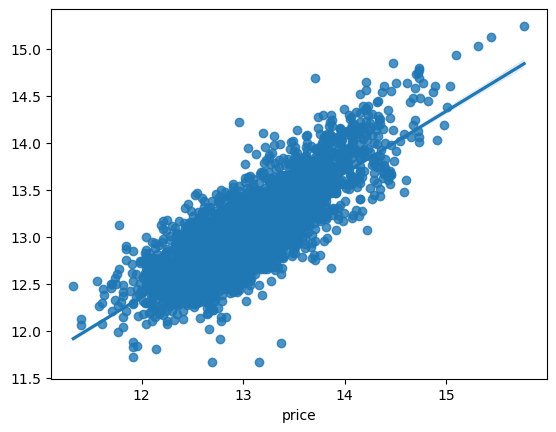

In [108]:
#Plotting the results of the model
sns.regplot(x=y_test, y=lr.predict(X_test))

In [111]:
#Now I will deal with the outliers present in the scaled data using the IQR method
Q1 = test_data.quantile(0.25)
Q3 = test_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

test_data_out = test_data[~((test_data < (Q1 - 1.5 * IQR)) | (test_data > (Q3 + 1.5 * IQR))).any(axis=1)]


sqft_living       0.578112
sqft_lot          0.751330
sqft_above        0.618652
sqft_basement     6.329721
sqft_living15     0.459638
sqft_lot15        0.681513
price             0.694697
day               0.980829
month             0.693147
year              0.000496
waterfront        0.000000
view              0.000000
condition         1.000000
grade             1.000000
yr_built         46.000000
yr_renovated      0.000000
bedrooms          1.000000
bathrooms         1.000000
floors            1.000000
neighborhoods     8.000000
dtype: float64


In [112]:
#Creating a Linear Regression model with the no outliers data and get some predictions
X = test_data_out.drop(['price'], axis=1)
y = test_data_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.5090443475598252
MAE: 0.24277454721598965
RMSE: 0.3022679119183997


<Axes: xlabel='price'>

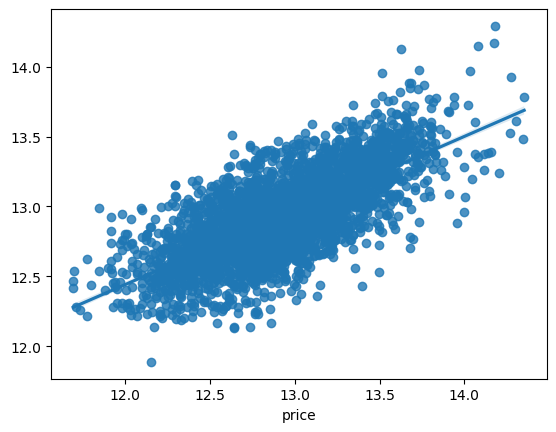

In [113]:
#Plottin the results of the model
sns.regplot(x=y_test, y=lr.predict(X_test))

After benchmarking the model with the log scaled data, it is worse than without it, so I will try to use the standardscaler data.

In [114]:
#Creating the dataframe with the Standard Scaler data
with open(r'C:\Users\Samu\Documents\Ironhack\House-Price-Prediction\files\std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

std_test_num = loaded_transformer.transform(numerical.drop(['price'], axis=1))

#Concatenating with the categorical data
std_test_data = pd.concat([pd.DataFrame(std_test_num, columns=numerical.drop(['price'], axis=1).columns), categorical], axis=1)

In [115]:
#Benchmark model with the standard scaled data
X = std_test_data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.6385379829541689
MAE: 140667.33202713993
RMSE: 216952.158924487


<Axes: xlabel='price'>

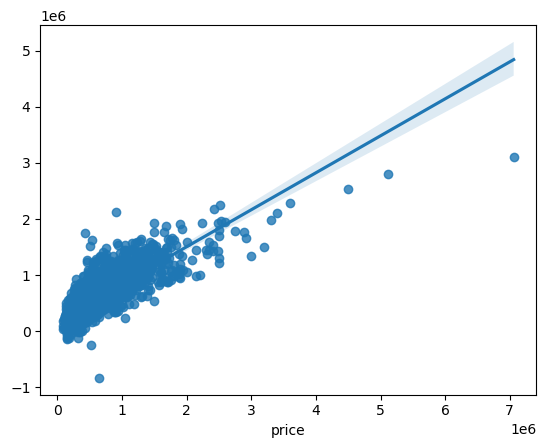

In [116]:
#Plotting the results of the model
sns.regplot(x=y_test, y=lr.predict(X_test))

In [117]:
#Now I will deal with the outliers in the standard scaled data and the target using the IQR method
std_test_out = pd.concat([pd.DataFrame(std_test_num, columns=numerical.drop(['price'], axis=1).columns), categorical, target], axis=1)

Q1 = std_test_out.quantile(0.25)
Q3 = std_test_out.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

std_test_out = std_test_out[~((std_test_out < (Q1 - 1.5 * IQR)) | (std_test_out > (Q3 + 1.5 * IQR))).any(axis=1)]



sqft_living           1.220676
sqft_lot              0.140434
sqft_above            1.234911
sqft_basement         1.262248
sqft_living15         1.273053
sqft_lot15            0.184377
day                   1.741506
month                 1.605638
year                  2.140133
waterfront            0.000000
view                  0.000000
condition             1.000000
grade                 1.000000
yr_built             46.000000
yr_renovated          0.000000
bedrooms              1.000000
bathrooms             1.000000
floors                1.000000
neighborhoods         8.000000
price            323000.000000
dtype: float64


In [118]:
#Creating a model with the no outliers standardscaled data
X = std_test_out.drop(['price'], axis=1)
y = std_test_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))


R2: 0.4953146874065031
MAE: 98005.64271632231
RMSE: 125818.61494808225


After benchmarking the standardscaler data, we cans see that it also didn't improve the model but worsened it a little bit. I will try to get rid of the outliers and see what happens.

In [119]:
#Getting rid of the outliers in price
no_out_data = pd.concat([numerical, categorical], axis=1)
remove_outliers(no_out_data, 'price')

R2: 0.5814150495211183
MAE: 104240.655379974
RMSE: 132165.50148562843


<Axes: xlabel='price'>

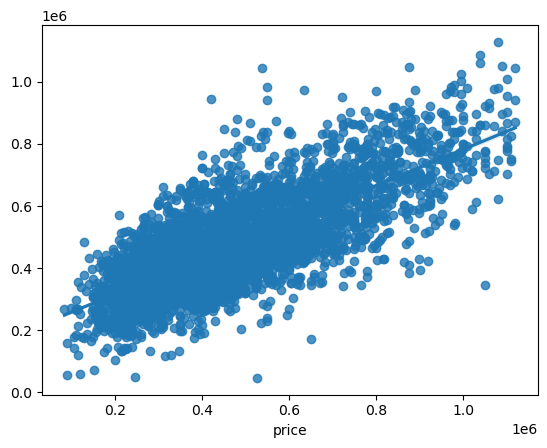

In [120]:
#Running the model without outliers
X = no_out_data.drop(['price'], axis=1)
y = no_out_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

#Plotting the results of the model
sns.regplot(x=y_test, y=lr.predict(X_test))


In [121]:
#Using standard scaler to the no outliers data
X = no_out_data.drop(['price'], axis=1)
y = no_out_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_transformer = StandardScaler()
X_transformer.fit(X_train)


X_train_std = X_transformer.transform(X_train)
X_test_std = X_transformer.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

R2: 0.5814150495211177
MAE: 104240.65537997392
RMSE: 132165.5014856285


Removing the outliers and scaling the dataframe without outliers didn't have the expected results. We have to keep searching for ways to ensure a good model. For that matter, I will try to do some feature selection.

In [122]:
#Creating a dataframe to check feature selection
fts_data = pd.concat([numerical, categorical], axis=1)

In [123]:
#Creating a model to check feature importance
X = fts_data.drop(['price'], axis=1)
y = fts_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.6385379829541689
MAE: 140667.33202713984
RMSE: 216952.15892448698


In [124]:
# Checking the feature importance
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

waterfront       572878.635838
grade            122679.316929
bathrooms         57272.981665
bedrooms          42253.462840
view              41942.139833
year              32747.103233
floors            25957.526702
condition         23349.086558
yr_built           3624.870466
month               989.163179
day                 301.501734
neighborhoods       114.305073
sqft_living         108.295938
sqft_basement        59.685657
sqft_above           48.610281
sqft_living15        29.165264
yr_renovated          9.423907
sqft_lot15            0.603539
sqft_lot              0.032762
dtype: float64

In [125]:
#Using VIF to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = add_constant(fts_data.drop(['price'], axis=1))

#pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

threshold = 10

while True:
    # calculates vif
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif


,0
day,1.012414
yr_renovated,1.143690
waterfront,1.203629
condition,1.245062
neighborhoods,1.304957
view,1.420930
bedrooms,1.620294
sqft_lot,2.089316
sqft_lot15,2.119534
floors,2.150737


,0
day,1.012414
yr_renovated,1.143690
waterfront,1.203629
condition,1.245062
neighborhoods,1.304957
view,1.420930
bedrooms,1.620294
sqft_basement,1.850291
sqft_lot,2.089316
sqft_lot15,2.119534


,const,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,day,month,year,waterfront,view,condition,grade,yr_built,yr_renovated,bedrooms,bathrooms,floors,neighborhoods
0,1.0,5650,1180,0,1340,5650,13,10,2014,0,0,3,7,1955,0,3,1,1,17
1,1.0,7242,2170,400,1690,7639,9,12,2014,0,0,3,7,1951,1991,3,2,2,12
2,1.0,10000,770,0,2720,8062,25,2,2015,0,0,3,6,1933,0,2,1,1,2
3,1.0,5000,1050,910,1360,5000,9,12,2014,0,0,5,7,1965,0,4,3,1,13
4,1.0,8080,1680,0,1800,7503,18,2,2015,0,0,3,8,1987,0,3,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,1131,1530,0,1530,1509,21,5,2014,0,0,3,8,2009,0,3,2,3,10
21593,1.0,5813,2310,0,1830,7200,23,2,2015,0,0,3,8,2014,0,4,2,2,14
21594,1.0,1350,1020,0,1020,2007,23,6,2014,0,0,3,7,2009,0,2,1,2,14
21595,1.0,2388,1600,0,1410,1287,16,1,2015,0,0,3,8,2004,0,3,2,2,2


In [126]:
#Checking the model with the selected 15 features in feature importance
X = fts_data[data_importance[:15].index]
y = fts_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))


R2: 0.6386836493707602
MAE: 140260.5402244176
RMSE: 216908.43949254227


With only ten features the model worsened, but with 15, it remained almost the same, with only a little bit of variance. I will keep it like that.

In [127]:
#Testing the model with the features selected by VIF
X = fts_data[vif.columns.drop('const')]
y = fts_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

r2 = lr.score(X_test, y_test)
mae = mean_absolute_error(lr.predict(X_test), y_test)
rmse = mean_squared_error(lr.predict(X_test), y_test, squared=False)

# Printing the results
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.6385379829541684
MAE: 140667.33202713975
RMSE: 216952.1589244871


<Axes: xlabel='price'>

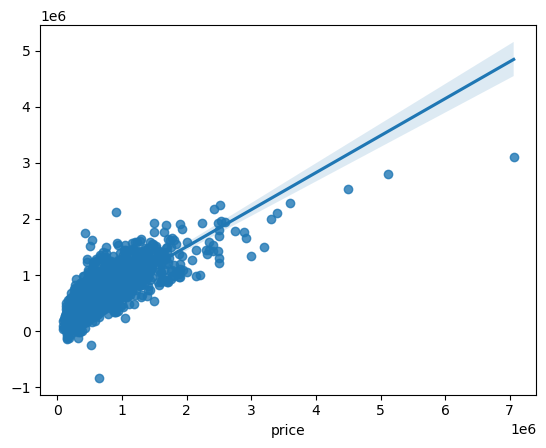

In [128]:
#Plotting the results of the model
sns.regplot(x=y_test, y=lr.predict(X_test))

In [129]:
for col in fts_data[vif.columns.drop('const')].columns:
    remove_outliers(fts_data, col)

In [136]:
#Testing the model with the no outliers data
X = fts_data[vif.columns.drop('const')]
y = fts_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

r2 = lr.score(X_test, y_test)
mae = mean_absolute_error(lr.predict(X_test), y_test)
rmse = mean_squared_error(lr.predict(X_test), y_test, squared=False)

# Printing the results
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.5049452389275719
MAE: 104123.36375487335
RMSE: 139308.05964174808


<Axes: xlabel='price'>

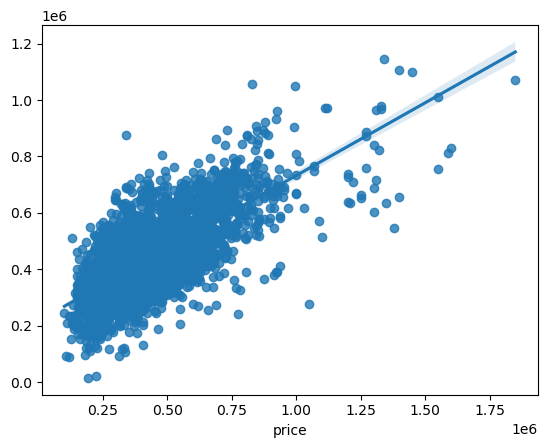

In [132]:
#Plotting the results
sns.regplot(x=y_test, y=lr.predict(X_test))

Even though I have scaled and removed outliers and used VIF for feature selection, still the model doesn't improve, only in the RMSE score.

In [133]:
#Now, testing with different modelsusing the function I created:
models = [LinearRegression(), Lasso(), RandomForestRegressor(), KNeighborsRegressor()]

model_testing(models, X_train, X_test, y_train, y_test)

,Model,MSE,RMSE,MAE,R2
0,LinearRegression(),1.940674e+10,139308.059642,104123.363755,0.504945
1,Lasso(),1.940675e+10,139308.096502,104123.211337,0.504945
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1.227330e+10,110784.904916,79912.432380,0.686915
3,KNeighborsRegressor(),2.451483e+10,156572.133283,116840.169334,0.374641


In the testing of different models, we can see that the best results are given by RandomForestRegressor by a great margin, with the lowest error and the highest R2 score. Maybe we can work with that model and tweak it a little bit.

In [140]:
#Creating a model with Random Forest and tweaking it
X = fts_data[vif.columns.drop('const')]
y = fts_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

r2 = rf.score(X_test, y_test)
mae = mean_absolute_error(rf.predict(X_test), y_test)
rmse = mean_squared_error(rf.predict(X_test), y_test, squared=False)

# Printing the results
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2: 0.6497955012485295
MAE: 88293.20323453755
RMSE: 117168.39550316815


<Axes: xlabel='price'>

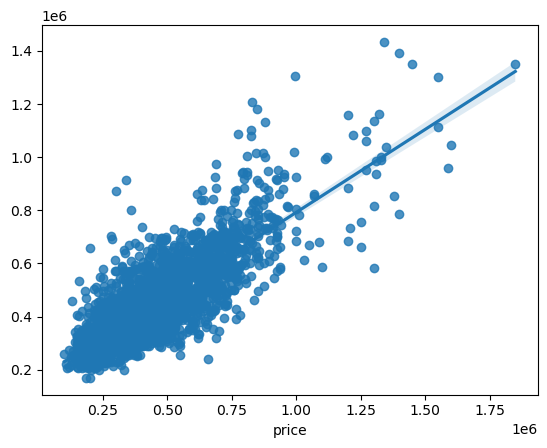

In [141]:
#Plotting the results
sns.regplot(x=y_test, y=rf.predict(X_test))

In [151]:
#Applying log transformation
numerical_log = numerical
numerical_log = numerical_log.apply(lambda x: np.log(x+1))

#Concatenating the log transformed numerical data with the categorical data
log_data = pd.concat([numerical_log, categorical], axis=1)

In [152]:
#Getting the VIIF of the log transformed data
vif = add_constant(log_data.drop(['price'], axis=1))

threshold = 10

while True:
    # calculates vif
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

,0
day,1.015790
yr_renovated,1.148392
waterfront,1.205979
condition,1.255865
neighborhoods,1.354452
view,1.389511
bedrooms,1.772957
yr_built,2.251800
bathrooms,2.282206
floors,2.536611


,0
day,1.015748
yr_renovated,1.146714
waterfront,1.205837
condition,1.242865
neighborhoods,1.354262
view,1.389413
bedrooms,1.683621
sqft_basement,1.733918
yr_built,2.240986
bathrooms,2.281769


In [154]:
#Testing the model with the log transformed data
X = log_data[vif.columns.drop('const')]
y = log_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

r2 = rf.score(X_test, y_test)
mae = mean_absolute_error(rf.predict(X_test), y_test)
rmse = mean_squared_error(rf.predict(X_test), y_test, squared=False)

# Printing the results
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.7284298611916229
MAE: 0.21125578559771235
RMSE: 0.27196025234808463


<Axes: xlabel='price'>

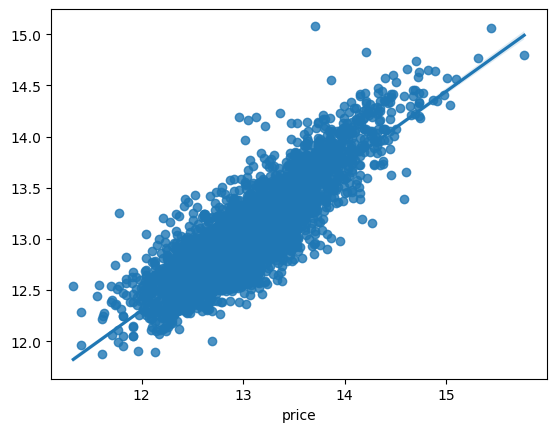

In [156]:
#Plotting the results
sns.regplot(x=y_test, y=rf.predict(X_test))

In [155]:
#Getting the feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance

grade            0.616800
yr_built         0.118552
sqft_living15    0.071503
neighborhoods    0.043770
sqft_above       0.034926
sqft_lot15       0.030553
sqft_basement    0.019830
bathrooms        0.014302
sqft_lot         0.013112
view             0.008372
day              0.005739
waterfront       0.005502
condition        0.005270
month            0.004166
bedrooms         0.003514
floors           0.001965
yr_renovated     0.001596
year             0.000529
dtype: float64

In [157]:
#Getting the data
nice_data = log_data[vif.columns.drop('const')]

In [158]:
nice_data = pd.concat([nice_data, log_data['price']], axis=1)

In [159]:
#Using the model with feature importance
X = nice_data[feature_importance[:15].index]
y = nice_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

r2 = rf.score(X_test, y_test)
mae = mean_absolute_error(rf.predict(X_test), y_test)
rmse = mean_squared_error(rf.predict(X_test), y_test, squared=False)

# Printing the results
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.7285941500606808
MAE: 0.21120291843506653
RMSE: 0.2718779774670372


<Axes: xlabel='price'>

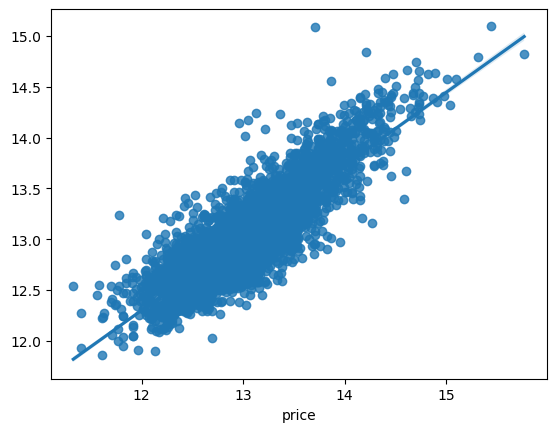

In [160]:
#Plotting the results
sns.regplot(x=y_test, y=rf.predict(X_test))